<a href="https://colab.research.google.com/github/tanishachoudhary/tanishachoudhary/blob/main/CAPSTONECROPPRO_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Team members:- Tanisha choudhary,Mosin ,Falguni Sharma, Chetan Sharma

# First we will do analysis of all the 5 datasets separately and generate some insights and then we will bring all the data together and make a desired model

# Analysis of  dataset 4th

Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import linear_model

In [ ]:
df3=pd.read_csv(r'C:\Users\lenovo\Downloads\state_wise_crop_production.csv')

#### We have load the data file, in which we have merged the dataset containing statewise cost of production and ideal ph, for reading csv_file we have called 'read_csv' present in pandas ,here 'r' is written before the path in read_csv because as we know, Path names on Windows tend to have backslashes in them. But we want them to mean actual backslashes, not special characters.

#### So for this we have to use 'r'.r stands for "raw" and will cause backslashes in the string to be interpreted as actual backslashes rather than special characters.

In [ ]:
df3.head(5)

Crop           State  Cost of Cultivation (`/Hectare) A2+FL  \
0  ARHAR   Uttar Pradesh                                9794.05   
1  ARHAR       Karnataka                               10593.15   
2  ARHAR         Gujarat                               13468.82   
3  ARHAR  Andhra Pradesh                               17051.66   
4  ARHAR     Maharashtra                               17130.55   

   Cost of Cultivation (`/Hectare) C2  Cost of Production (`/Quintal) C2  \
0                            23076.74                            1941.55   
1                            16528.68                            2172.46   
2                            19551.90                            1898.30   
3                            24171.65                            3670.54   
4                            25270.26                            2775.80   

   Yield (Quintal/ Hectare)   
0                       9.83  
1                       7.47  
2                       9.59  
3                       6.42  
4                       8.72

#### Here, we have print the top 5 rows of dataframe by the help of head function

In [ ]:
df3.shape

(49, 6)

#### We can see that there are 49 rows and 7columns

In [ ]:
df3.columns

Index(['Crop', 'State', 'Cost of Cultivation (`/Hectare) A2+FL',
       'Cost of Cultivation (`/Hectare) C2',
       'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) '],
      dtype='object')

#### We have displayed the name of columns present in above dataset

1. Crop : representing the name of Crop

2. State : the name of state according to the crop production means for Ex: if crop is Arhar  and state is UttarPradesh that means we are talking about Arhar crop of state Up


### Now we are looking our column having cost of cultivation A2+Fl or c2 now first understand what is A2,Fl C2 cost ?

#### Cost A2 
These are the costs the farmer actually pays out of his/her pocket for buying various inputs ranging from seeds to fertilisers to pesticides to hired labour to hired machinery or even leased-in land.

#### Cost A2 +FL 
In agriculture, farmers also use a lot of family labour and if their cost is imputed and added to cost A2, that concept is called cost A2+FL.

#### Cost C2 
The Comprehensive cost (cost C2), it includes imputed costs of family labour, imputed rent of owned land and imputed interest on owned capital.

C2 incorporates A2 + FL + interest on the value of owned capital assets (excluding land) + rental value of owned land (net of land revenue).
now we have cost of cultivation and cost of production

#### Let us understand the difference between cost of cultivation and cost of production
#### Cost of cultivation:

Cost of cultivation refers to the total expenses incurred in cultivating one hectare of pineapple. The cost of cultivation is worked out by input wise and operation wise together with their percentage to the total.

#### Cost of production:

Cost of production is the dollar value of all your inputs for growing a specific crop. For example, to produce an acre of tomatoes, these inputs would include so many units of seed, fertiliser, irrigation water, labour and machinery time, etc. Add them up, and you have the cost of production for the crop.

In [ ]:
df3.isnull().sum()

Crop                                     0
State                                    0
Cost of Cultivation (`/Hectare) A2+FL    0
Cost of Cultivation (`/Hectare) C2       0
Cost of Production (`/Quintal) C2        0
Yield (Quintal/ Hectare)                 0
dtype: int64

#### As it is clearly visible that there is no null value .

In [ ]:
df3.dtypes

Crop                                      object
State                                     object
Cost of Cultivation (`/Hectare) A2+FL    float64
Cost of Cultivation (`/Hectare) C2       float64
Cost of Production (`/Quintal) C2        float64
Yield (Quintal/ Hectare)                 float64
dtype: object

#### Now we have checked datatypes of each column.

In [ ]:
df3.describe()

Cost of Cultivation (`/Hectare) A2+FL  \
count                              49.000000   
mean                            20363.537347   
std                             13561.435306   
min                              5483.540000   
25%                             12774.410000   
50%                             17022.000000   
75%                             24731.060000   
max                             66335.060000   

       Cost of Cultivation (`/Hectare) C2  Cost of Production (`/Quintal) C2  \
count                           49.000000                          49.000000   
mean                         31364.666735                        1620.537755   
std                          20095.783569                        1104.990472   
min                           7868.640000                          85.790000   
25%                          19259.840000                         732.620000   
50%                          25909.050000                        1595.560000   
75%                          35423.480000                        2228.970000   
max                          91442.630000                        5777.480000   

       Yield (Quintal/ Hectare)   
count                  49.000000  
mean                   98.086735  
std                   245.293123  
min                     1.320000  
25%                     9.590000  
50%                    13.700000  
75%                    36.610000  
max                  1015.450000

#### Basically describe fuction helps to give some stastitical type description for numerical values like mean,count etc,

#### But you can have a doubt that why only we are able to see only five  features decription in output ,what about remaining as only these five are float or int type but other are object datatype that's why ...

## Let us now understand the relation between cost of cultivation  A2+Fl or c2

In [ ]:
sns.lmplot(data=df3,x='Cost of Cultivation (`/Hectare) A2+FL',y='Cost of Cultivation (`/Hectare) C2',fit_reg=False)

#### As we can see that cost(c2) is increasing on increasing A2+Fl because it is obvious as we have already seen that C2 includes A2+FL cost . 

In [ ]:
df3['Crop']

0                    ARHAR
1                    ARHAR
2                    ARHAR
3                    ARHAR
4                    ARHAR
5                   COTTON
6                   COTTON
7                   COTTON
8                   COTTON
9                   COTTON
10                    GRAM
11                    GRAM
12                    GRAM
13                    GRAM
14                    GRAM
15               GROUNDNUT
16               GROUNDNUT
17               GROUNDNUT
18               GROUNDNUT
19               GROUNDNUT
20                   MAIZE
21                   MAIZE
22                   MAIZE
23                   MAIZE
24                   MAIZE
25                   MOONG
26                   MOONG
27                   MOONG
28                   MOONG
29                   MOONG
30                   PADDY
31                   PADDY
32                   PADDY
33                   PADDY
34                   PADDY
35    RAPESEED AND MUSTARD
36    RAPESEED AND MUSTARD
3

In [ ]:
Arhar_df = df3[df3["Crop"]=="ARHAR"]
print(Arhar_df.shape)
Arhar_df

(5, 6)


Crop           State  Cost of Cultivation (`/Hectare) A2+FL  \
0  ARHAR   Uttar Pradesh                                9794.05   
1  ARHAR       Karnataka                               10593.15   
2  ARHAR         Gujarat                               13468.82   
3  ARHAR  Andhra Pradesh                               17051.66   
4  ARHAR     Maharashtra                               17130.55   

   Cost of Cultivation (`/Hectare) C2  Cost of Production (`/Quintal) C2  \
0                            23076.74                            1941.55   
1                            16528.68                            2172.46   
2                            19551.90                            1898.30   
3                            24171.65                            3670.54   
4                            25270.26                            2775.80   

   Yield (Quintal/ Hectare)   
0                       9.83  
1                       7.47  
2                       9.59  
3                       6.42  
4                       8.72

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(Arhar_df["State"],Arhar_df["Cost of Cultivation (`/Hectare) A2+FL"])
plt.xticks(rotation=90)
plt.show()

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


#### From Above Graph we can say Uttar pradesh has least cost of Cultivation(A2+Fl) for Arhar crop and if we cultivate Arhar in andhra pradesh or maharashtra cost will be so high 

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


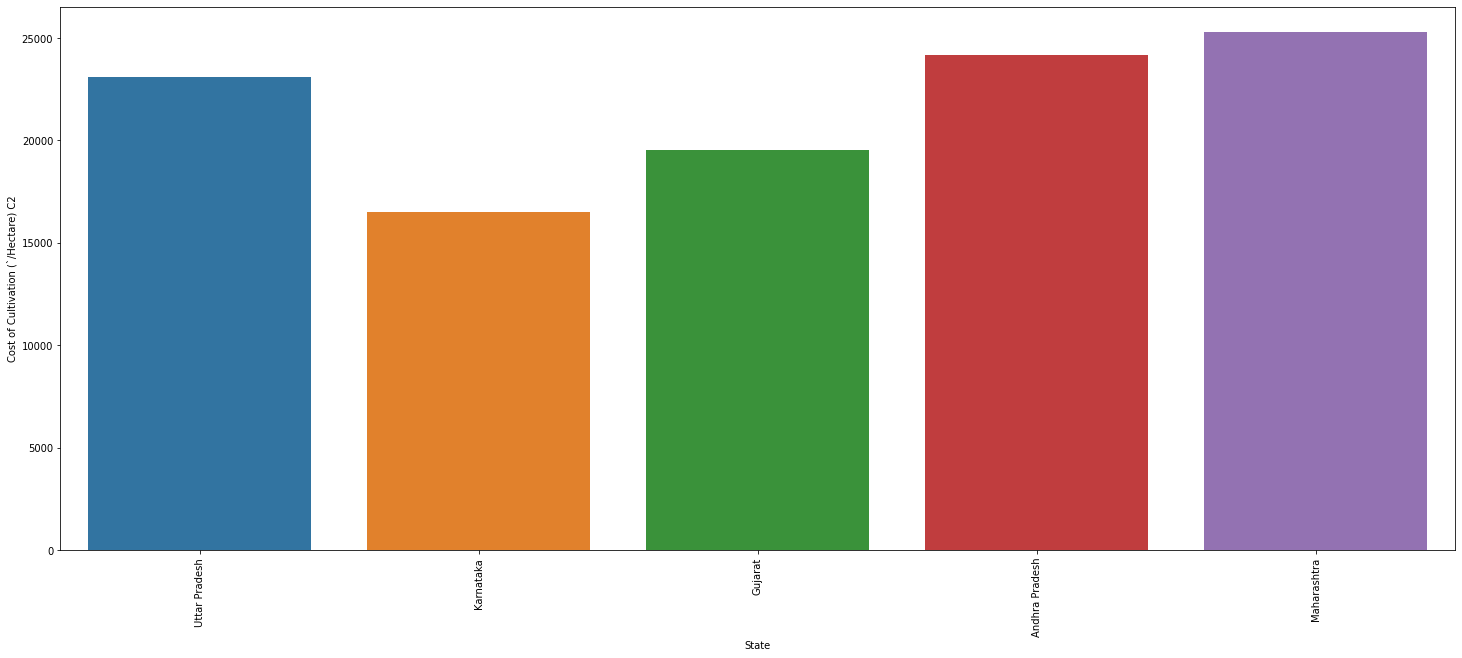

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(Arhar_df["State"],Arhar_df["Cost of Cultivation (`/Hectare) C2"])
plt.xticks(rotation=90)
plt.show()

#### Karnatka has least cost ofcultivation (c2) for Arhar .But we have seen A2+Fl cost is least for uttar pradesh. AS we know c2 includes rent of land or interest of capital along with A2+Fl cost 
#### And it can be seen in two ways:
1. for example for  buisness puropse:
  If buisnessman having its land in uttar pradesh and also in karnataka and want to use that land for cultivating arhar then he he or she should choose uttar pradesh because as they have their own land so need to consider the rent of land so for better profit other cost should be less means Up is best.
  
2.  And in case if they don't have their own land then karnatka is best in point of view of less cost  

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(Arhar_df["State"],Arhar_df["Cost of Production (`/Quintal) C2"])
plt.xticks(rotation=90)
plt.show()

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


cost of production of Arhar is less in UP

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(Arhar_df["State"],Arhar_df["Yield (Quintal/ Hectare) "])
plt.xticks(rotation=90) 
plt.show()

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


#### We can see the yield of Arhar is more in UP but we have seen the cost of cultivation including rent of land that was more in UP than karnatka but the percentage of increment of cost of cultivation and percentage of yield between UP and karnatka(both type of percentage value is similar) so we will go according to yield so UP is best state for earning good profit in croping of ARHAR

NOW ANALYSIS FOR COTTON

In [ ]:
cotton_df = df3[df3["Crop"]=="COTTON"]
print(cotton_df.shape)
cotton_df

(5, 6)


Crop           State  Cost of Cultivation (`/Hectare) A2+FL  \
5  COTTON     Maharashtra                               23711.44   
6  COTTON          Punjab                               29047.10   
7  COTTON  Andhra Pradesh                               29140.77   
8  COTTON         Gujarat                               29616.09   
9  COTTON         Haryana                               29918.97   

   Cost of Cultivation (`/Hectare) C2  Cost of Production (`/Quintal) C2  \
5                            33116.82                            2539.47   
6                            50828.83                            2003.76   
7                            44756.72                            2509.99   
8                            42070.44                            2179.26   
9                            44018.18                            2127.35   

   Yield (Quintal/ Hectare)   
5                      12.69  
6                      24.39  
7                      17.83  
8                      19.05  
9                      19.90

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(cotton_df["State"],cotton_df["Cost of Cultivation (`/Hectare) A2+FL"])
plt.xticks(rotation=90)
plt.show()

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


#### From Above Graph we can say Maharashtra has least cost of Cultivation(A2+Fl) for Cotton crop. and if we cultivate cotton in Gujarat or Haryana cost will be so high

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


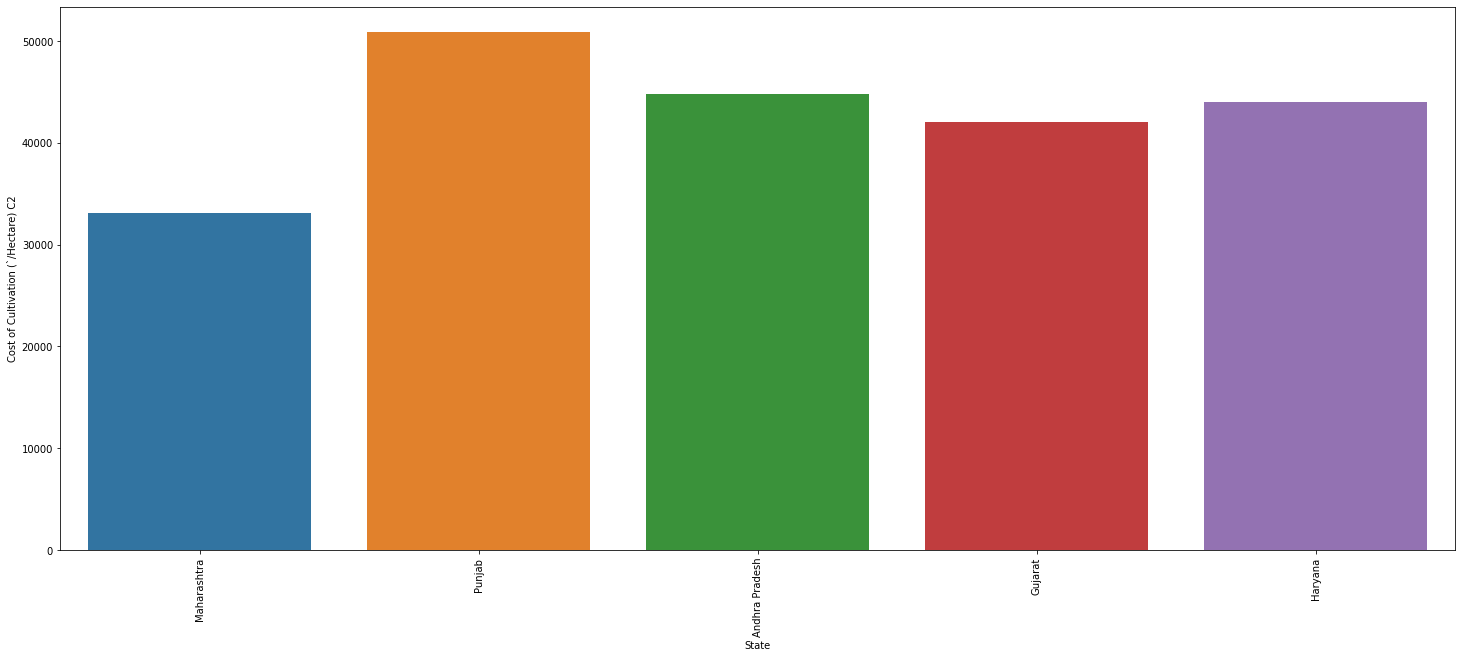

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(cotton_df["State"],cotton_df["Cost of Cultivation (`/Hectare) C2"])
plt.xticks(rotation=90)
plt.show()

### Maharashtra has least cost ofcultivation (c2) for Cotton 

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(cotton_df["State"],cotton_df["Cost of Production (`/Quintal) C2"])
plt.xticks(rotation=90)
plt.show()

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


#### Punjab has least cost of production but Maharashtra has maximum cost of production of cotton

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(cotton_df["State"],cotton_df["Yield (Quintal/ Hectare) "])
plt.xticks(rotation=90) 
plt.show()

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


### Punjab has highest yield of ctton production so its percentage ofincrement in yield compare to other state easily cover the increment of cost of cultivation(c2) so we can say we get a better profit if  punjab will be selected for cotton's cultivation

NOW for GRAM

In [ ]:
gram_df = df3[df3["Crop"]=="GRAM"]
print(gram_df.shape)
gram_df

(5, 6)


Crop           State  Cost of Cultivation (`/Hectare) A2+FL  \
10  GRAM       Rajasthan                                8552.69   
11  GRAM  Madhya Pradesh                                9803.89   
12  GRAM   Uttar Pradesh                               12833.04   
13  GRAM     Maharashtra                               12985.95   
14  GRAM  Andhra Pradesh                               14421.98   

    Cost of Cultivation (`/Hectare) C2  Cost of Production (`/Quintal) C2  \
10                            12610.85                            1691.66   
11                            16873.17                            1551.94   
12                            21618.43                            1882.68   
13                            18679.33                            2277.68   
14                            26762.09                            1559.04   

    Yield (Quintal/ Hectare)   
10                       6.83  
11                      10.29  
12                      10.93  
13                       8.05  
14                      16.69

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(gram_df["State"],gram_df["Cost of Cultivation (`/Hectare) A2+FL"])
plt.xticks(rotation=90)
plt.show()

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


### Rajsthan has least cost of cultivation(A2+Fl)of Gram crop

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


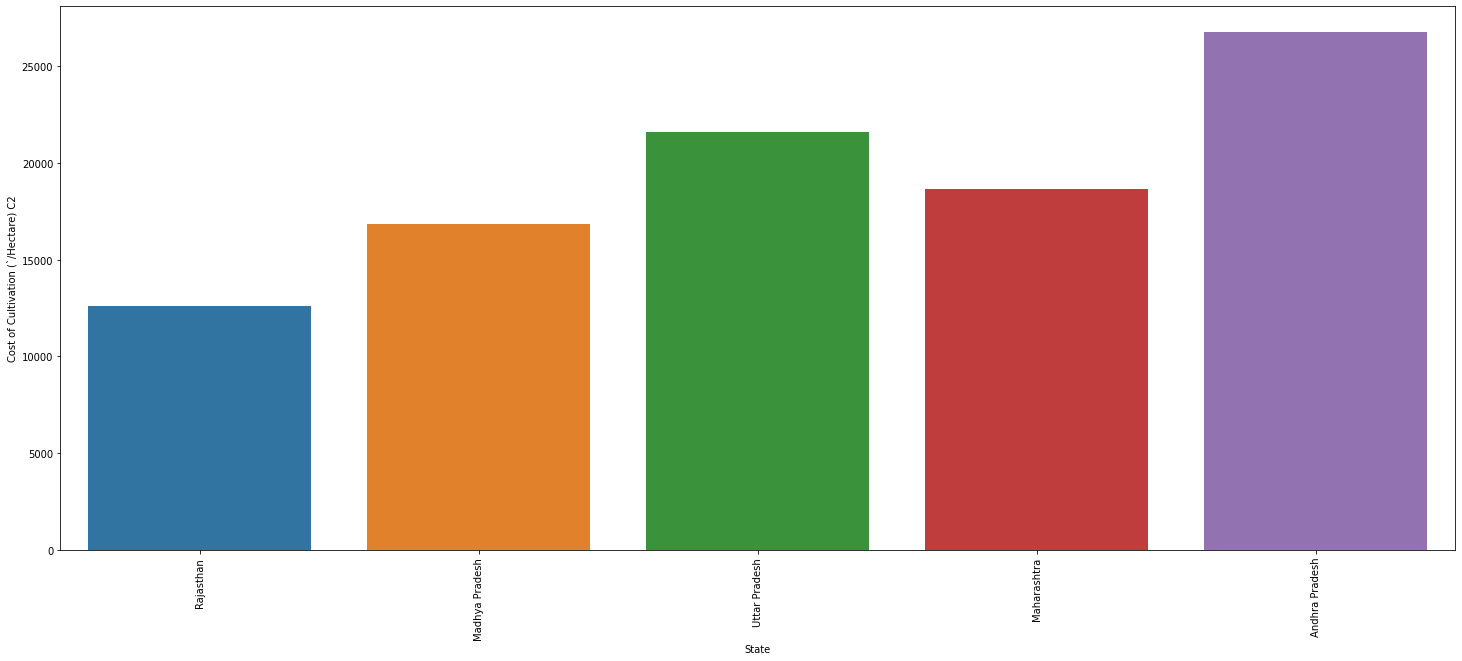

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(gram_df["State"],gram_df["Cost of Cultivation (`/Hectare) C2"])
plt.xticks(rotation=90)
plt.show()

### cost of cultivation(c2 ) is also low for rajasthan 

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(gram_df["State"],gram_df["Cost of Production (`/Quintal) C2"])
plt.xticks(rotation=90)
plt.show()

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


### Cost of production is little bit high in  Rajasthan as compared to Madhya Pradesh and Andhra pradesh but Andhra Pradesh cost of cultivation is too high as compared to rajasthan , so NOw yield will be decidability factor between MP,AP and Rajasthan   

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


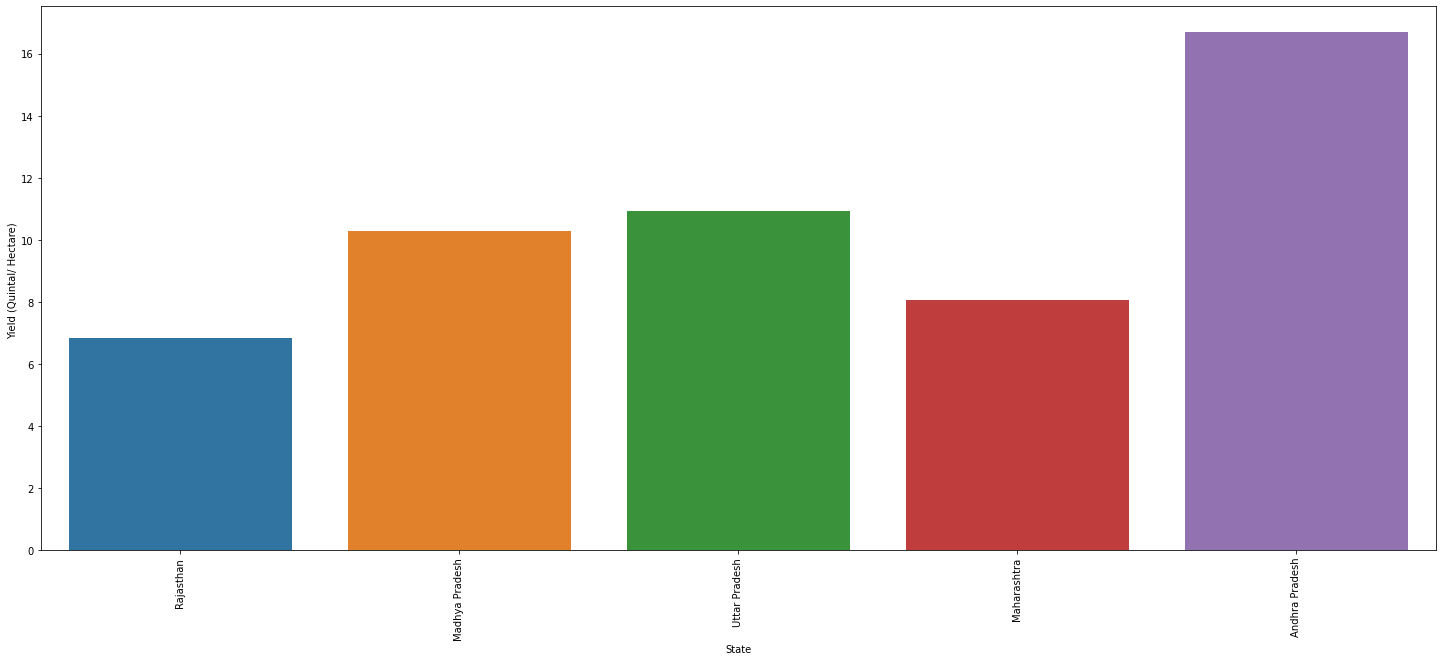

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(gram_df["State"],gram_df["Yield (Quintal/ Hectare) "])
plt.xticks(rotation=90) 
plt.show()

### But the yield of gram in Andhra predesh is very high so its profit will easily compensate the costs

NOW ANALYSIS FOR GROUNDNUT 

In [ ]:
grou_df = df3[df3["Crop"]=="GROUNDNUT"]
print(grou_df.shape)
grou_df

(5, 6)


Crop           State  Cost of Cultivation (`/Hectare) A2+FL  \
15  GROUNDNUT       Karnataka                               13647.10   
16  GROUNDNUT  Andhra Pradesh                               21229.01   
17  GROUNDNUT      Tamil Nadu                               22507.86   
18  GROUNDNUT         Gujarat                               22951.28   
19  GROUNDNUT     Maharashtra                               26078.66   

    Cost of Cultivation (`/Hectare) C2  Cost of Production (`/Quintal) C2  \
15                            17314.20                            3484.01   
16                            30434.61                            2554.91   
17                            30393.66                            2358.00   
18                            30114.45                            1918.92   
19                            32683.46                            3207.35   

    Yield (Quintal/ Hectare)   
15                       4.71  
16                      11.97  
17                      11.98  
18                      13.45  
19                       9.33

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(grou_df["State"],grou_df["Cost of Cultivation (`/Hectare) A2+FL"])
plt.xticks(rotation=90)
plt.show()

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


### Least cost of cultivation (A2+Fl) of crop Groundnnut is least in karnataka

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(grou_df["State"],grou_df["Cost of Cultivation (`/Hectare) C2"])
plt.xticks(rotation=90)
plt.show()

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


### cost of cultivation is too low for karnataka

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


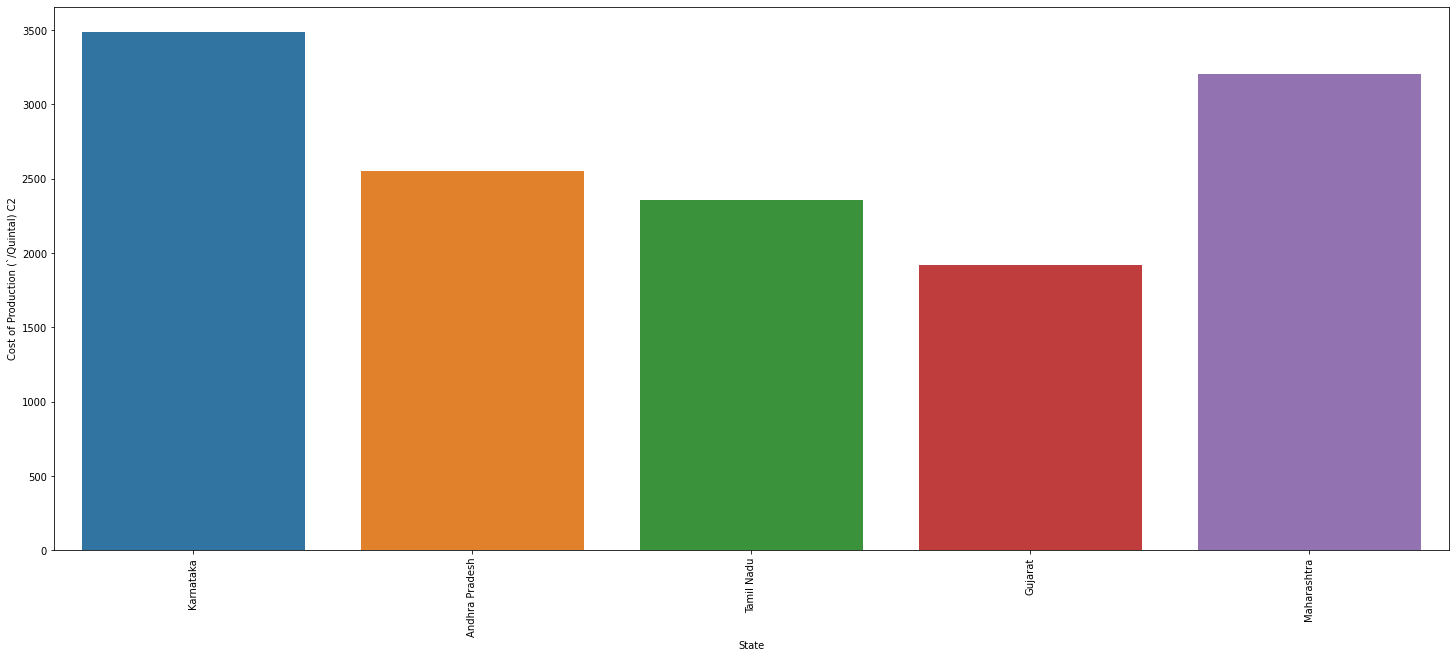

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(grou_df["State"],grou_df["Cost of Production (`/Quintal) C2"])
plt.xticks(rotation=90)
plt.show()

### But cost of production is low for GROUNDNUT in Gujarat so take next decdability factor ,that is yield.

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


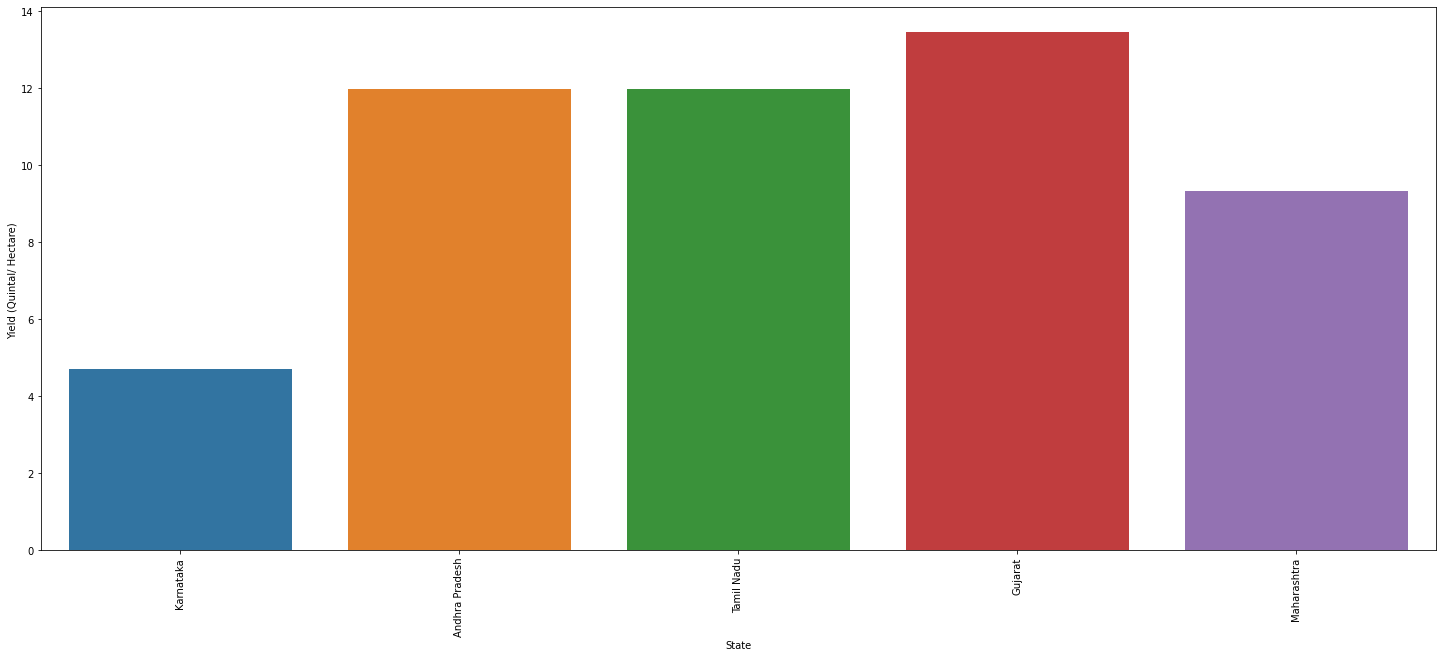

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(grou_df["State"],grou_df["Yield (Quintal/ Hectare) "])
plt.xticks(rotation=90) 
plt.show()

### The yield is more in Gujarat hence Gujarat will be perfect for groundnut and the percentage of increment of yield is much better than karnatka so cost will be covered easily.

In [ ]:
mai_df = df3[df3["Crop"]=="MAIZE"]
print(mai_df.shape)
mai_df

(5, 6)


Crop           State  Cost of Cultivation (`/Hectare) A2+FL  \
20  MAIZE           Bihar                               13513.92   
21  MAIZE       Karnataka                               13792.85   
22  MAIZE       Rajasthan                               14421.46   
23  MAIZE   Uttar Pradesh                               15635.43   
24  MAIZE  Andhra Pradesh                               25687.09   

    Cost of Cultivation (`/Hectare) C2  Cost of Production (`/Quintal) C2  \
20                            19857.70                             404.43   
21                            20671.54                             581.69   
22                            19810.29                             658.77   
23                            21045.11                            1387.36   
24                            37801.85                             840.58   

    Yield (Quintal/ Hectare)   
20                      42.95  
21                      31.10  
22                      23.56  
23                      13.70  
24                      42.68

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


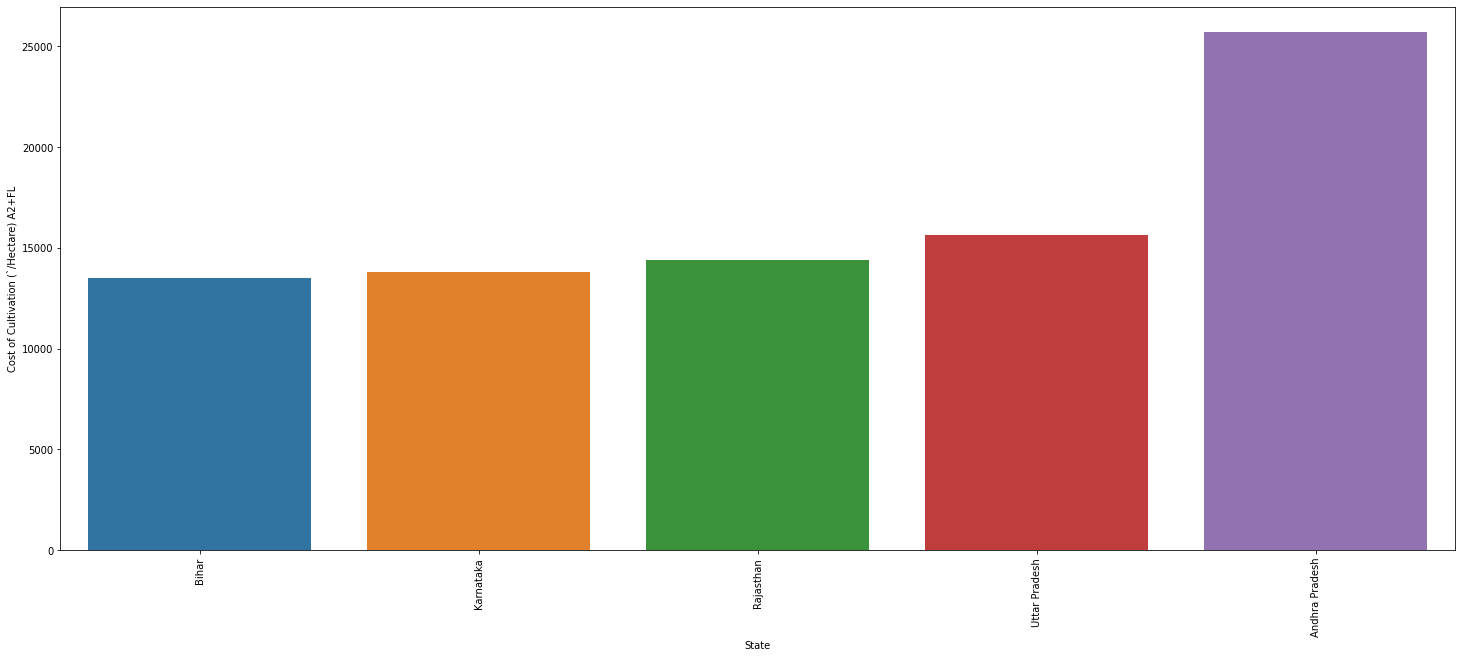

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(mai_df["State"],mai_df["Cost of Cultivation (`/Hectare) A2+FL"])
plt.xticks(rotation=90)
plt.show()

### In Bihar and Karnataka cost of cultivation is least for cultivation of maize,in UP and rajasthan little bit high .

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


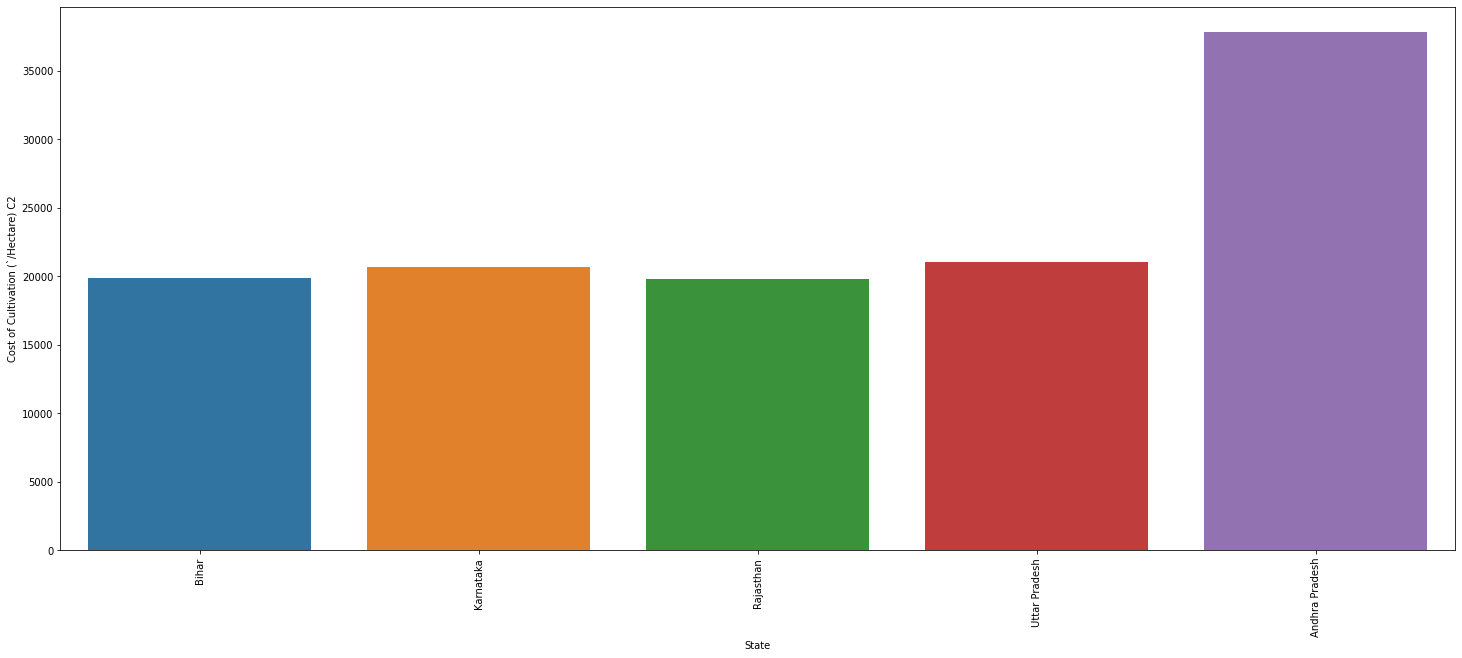

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(mai_df["State"],mai_df["Cost of Cultivation (`/Hectare) C2"])
plt.xticks(rotation=90)
plt.show()

###  Cost of cultivation c2 for Maize  is least (rent of land is least in Rajasthan),and UP bihar ,karnatka is little bit high 

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


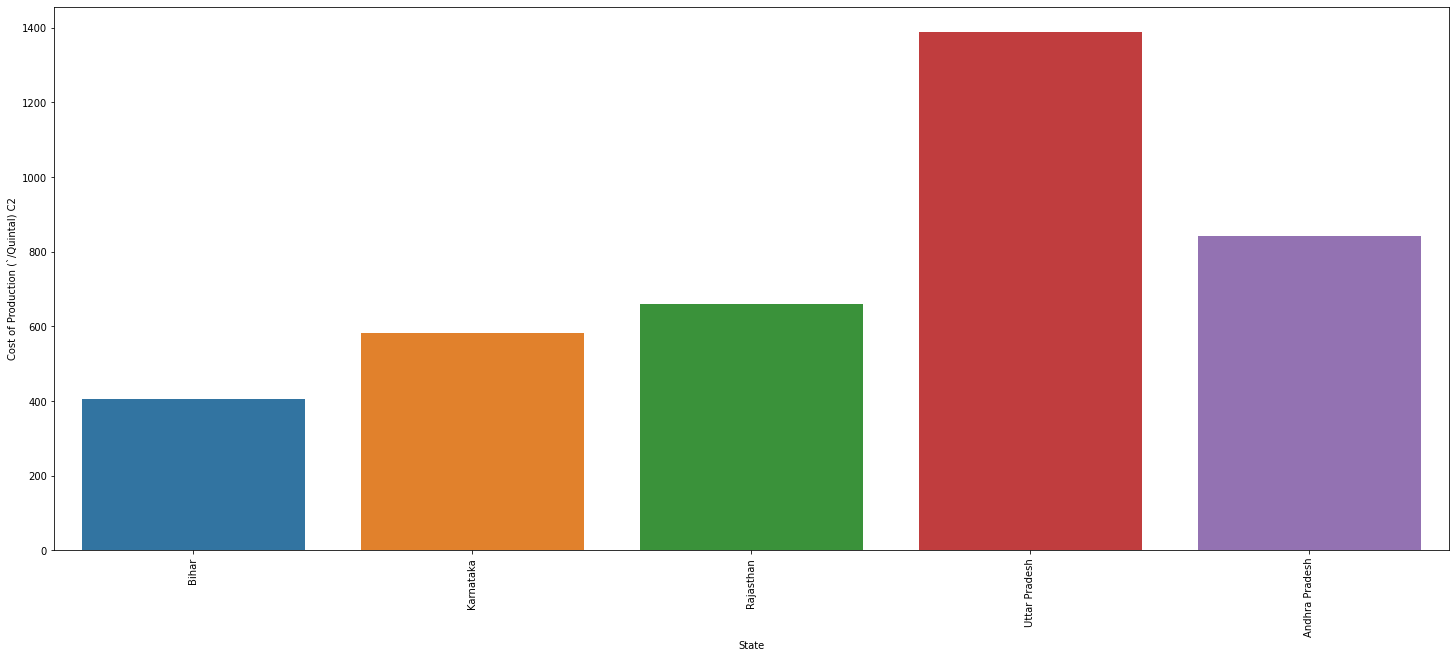

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(mai_df["State"],mai_df["Cost of Production (`/Quintal) C2"])
plt.xticks(rotation=90)
plt.show()

# cost of production of maize is least in bihar

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


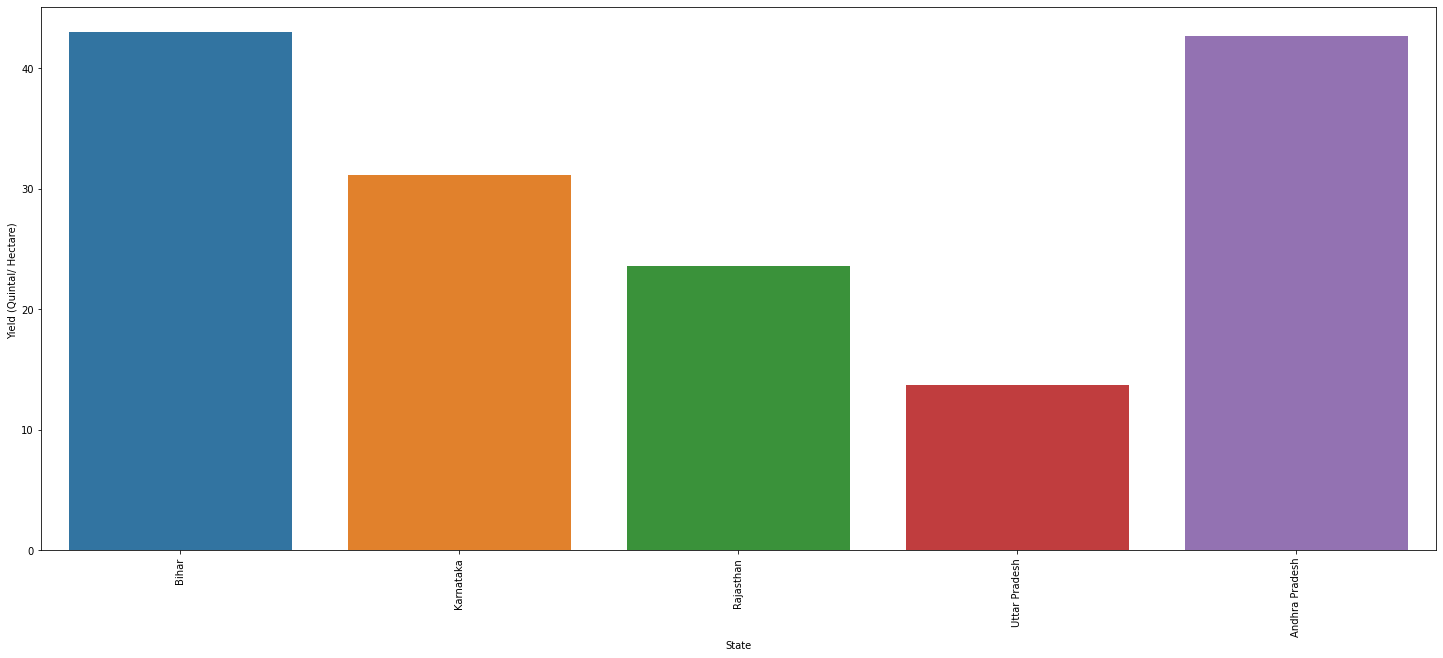

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(mai_df["State"],mai_df["Yield (Quintal/ Hectare) "])
plt.xticks(rotation=90) 
plt.show()

### AS we can say yield is equivalent in Bihar and Andhra Pradesh but the more profit will be earned if cultivation will be done in Bihar because cost of cultivation is also less in Bihar.

In [ ]:
mon_df = df3[df3["Crop"]=="MOONG"]
print(mon_df.shape)
mon_df

(5, 6)


Crop           State  Cost of Cultivation (`/Hectare) A2+FL  \
25  MOONG          Orissa                                5483.54   
26  MOONG       Rajasthan                                6204.23   
27  MOONG       Karnataka                                6440.64   
28  MOONG  Andhra Pradesh                                6684.18   
29  MOONG     Maharashtra                               10780.76   

    Cost of Cultivation (`/Hectare) C2  Cost of Production (`/Quintal) C2  \
25                             8266.98                            2614.14   
26                             9165.59                            2068.67   
27                             7868.64                            5777.48   
28                            13209.32                            2228.97   
29                            15371.45                            2261.24   

    Yield (Quintal/ Hectare)   
25                       3.01  
26                       4.05  
27                       1.32  
28                       5.90  
29                       6.70

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


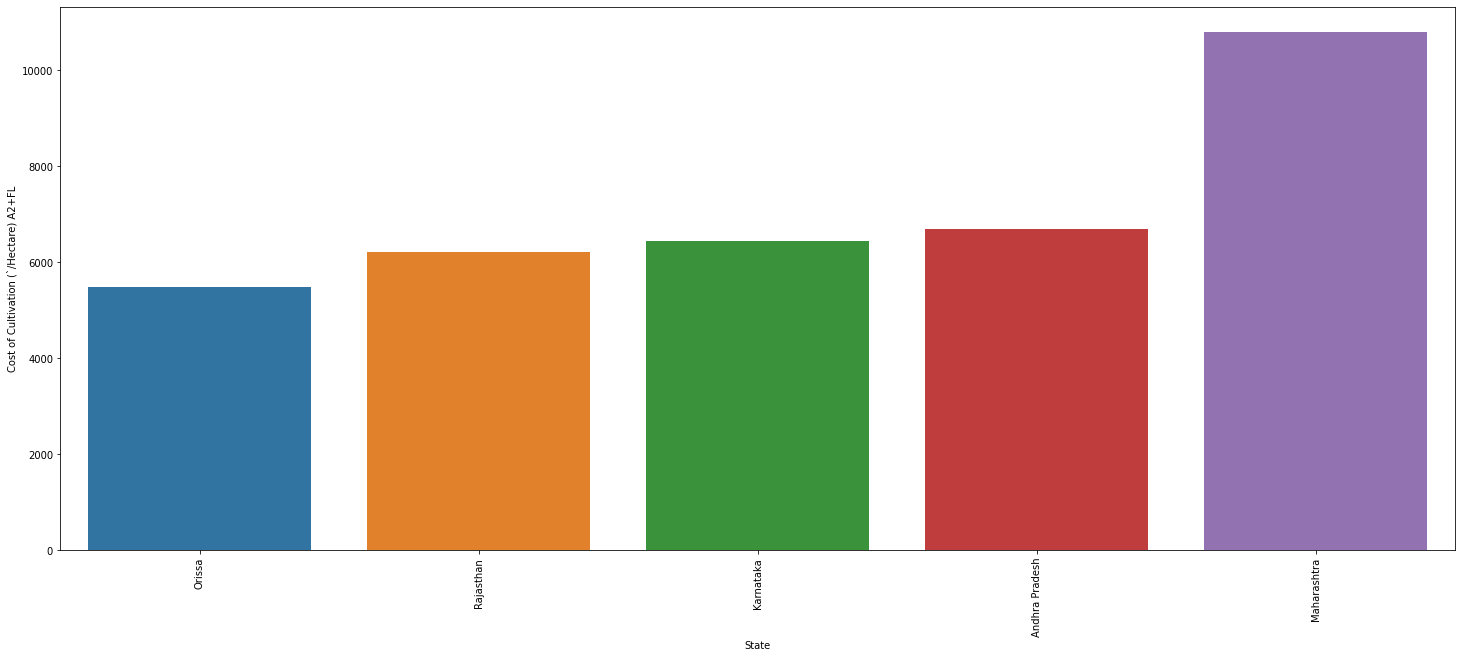

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(mon_df["State"],mon_df["Cost of Cultivation (`/Hectare) A2+FL"])
plt.xticks(rotation=90)
plt.show()

### Cost of cultivation of Moong is less in Orissa

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


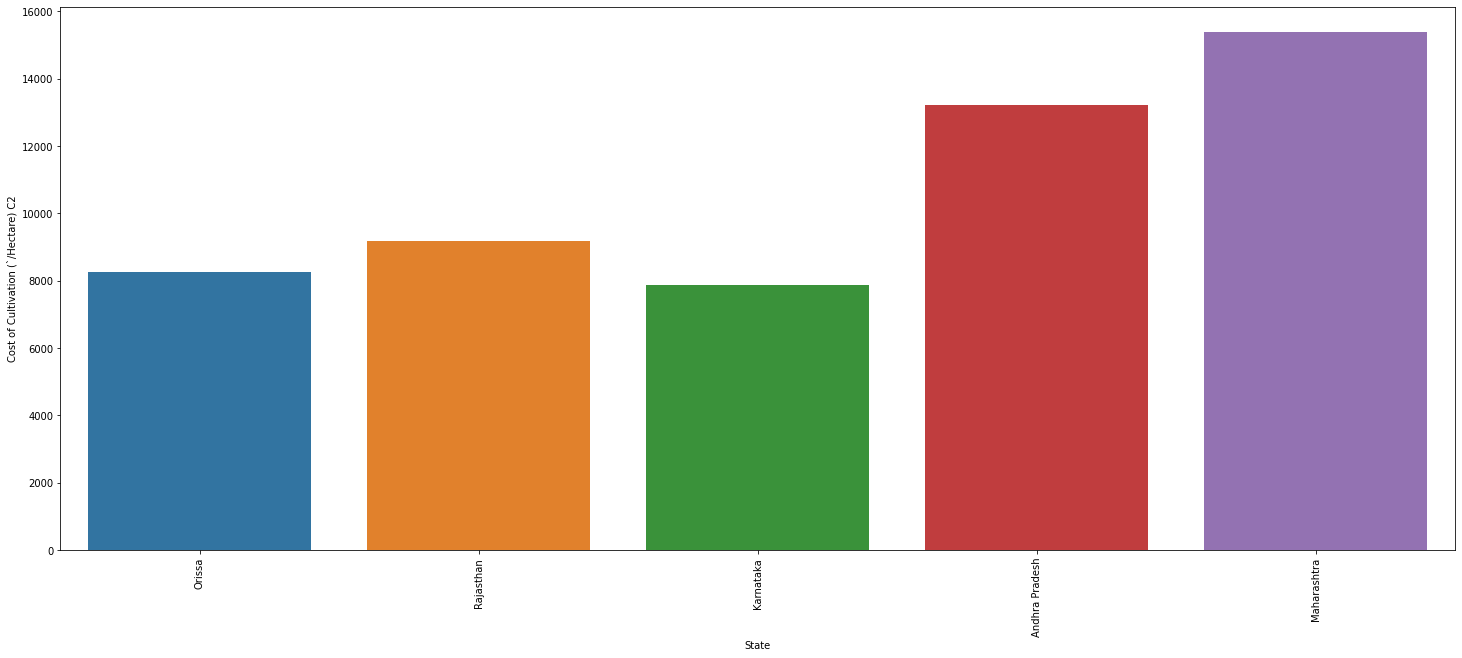

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(mon_df["State"],mon_df["Cost of Cultivation (`/Hectare) C2"])
plt.xticks(rotation=90)
plt.show()

### Cost of cultivation including rental cost is less in karnatka,little bit high in Orissa but if we exclude rent cost then orissa is better

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(mon_df["State"],mon_df["Cost of Production (`/Quintal) C2"])
plt.xticks(rotation=90)
plt.show()

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


### cost of production is least in Rajasthan ,In AP,Maharashtra and Orissa Little bit more

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(mon_df["State"],mon_df["Yield (Quintal/ Hectare) "])
plt.xticks(rotation=90) 
plt.show()

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


### As we can see the best yield Of Moong  is in Maharashtra but the cost of cultivation is also too high  but if we see Andhra pradesh the yield is little bit less from Maharashtra but cost of cultivation is too less so much better profit will be earned in crop will be cultivated in Andhra Pradesh ,some conclusion:
#### 1. for Profit purpose AP is best choice
#### 2. for best yield Maharashtra is best .

In [ ]:
padd_df = df3[df3["Crop"]=="PADDY"]
print(padd_df.shape)
padd_df

(5, 6)


Crop           State  Cost of Cultivation (`/Hectare) A2+FL  \
30  PADDY   Uttar Pradesh                               17022.00   
31  PADDY          Orissa                               17478.05   
32  PADDY     West Bengal                               24731.06   
33  PADDY          Punjab                               25154.75   
34  PADDY  Andhra Pradesh                               29664.84   

    Cost of Cultivation (`/Hectare) C2  Cost of Production (`/Quintal) C2  \
30                            28144.50                             732.62   
31                            25909.05                             715.04   
32                            33046.12                             731.25   
33                            45291.24                             669.86   
34                            46450.20                             789.90   

    Yield (Quintal/ Hectare)   
30                      36.61  
31                      32.42  
32                      39.04  
33                      67.41  
34                      56.00

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(padd_df["State"],padd_df["Cost of Cultivation (`/Hectare) A2+FL"])
plt.xticks(rotation=90)
plt.show()

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


### UP and Orissa has least cost of cultivation(A2+Fl) is least in UP,Orissa

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


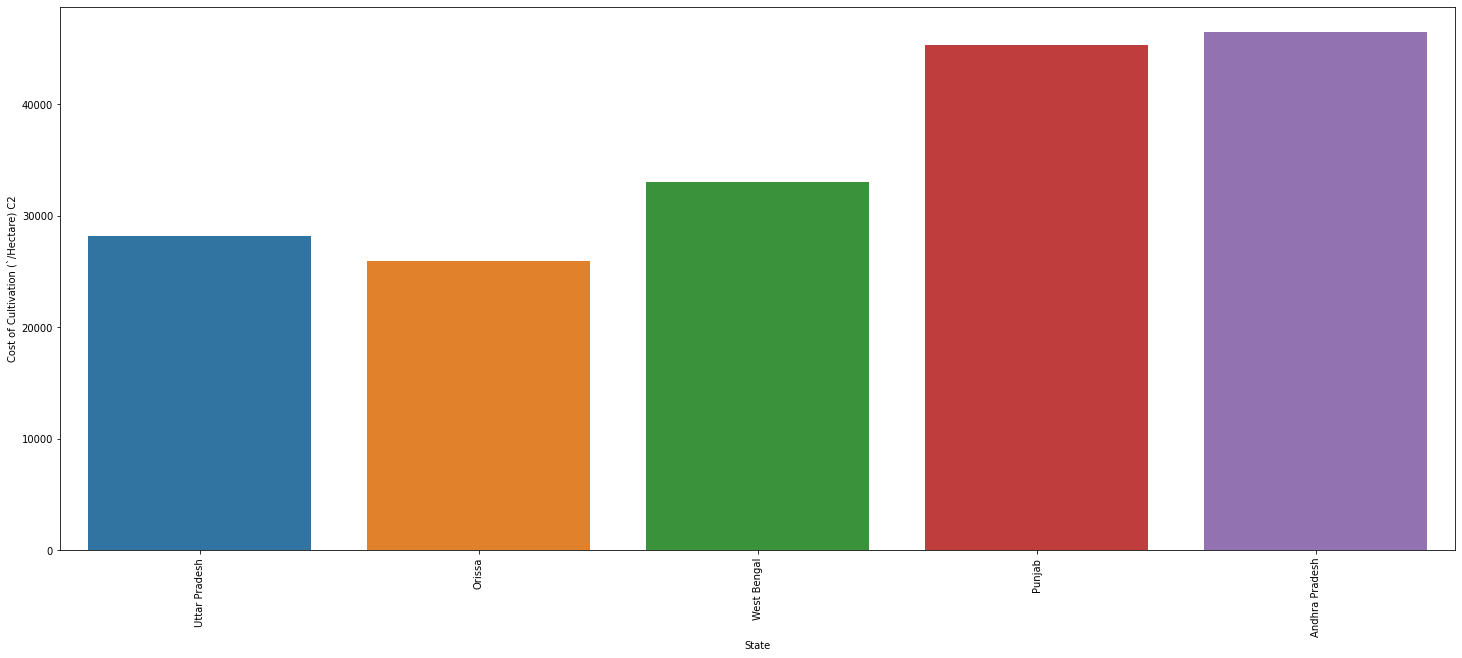

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(padd_df["State"],padd_df["Cost of Cultivation (`/Hectare) C2"])
plt.xticks(rotation=90)
plt.show()

### cost of cultivation (c2) is less in orissa ,little bit hifh in UP

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


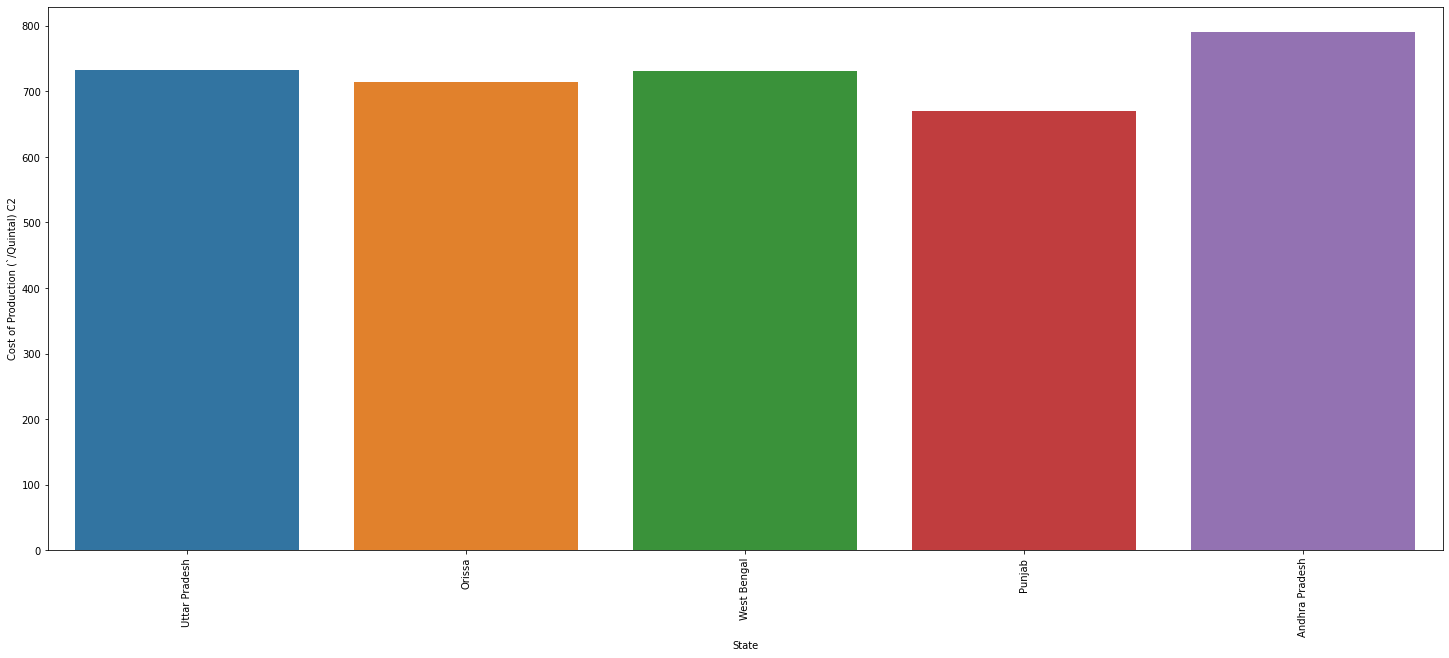

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(padd_df["State"],padd_df["Cost of Production (`/Quintal) C2"])
plt.xticks(rotation=90)
plt.show()

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


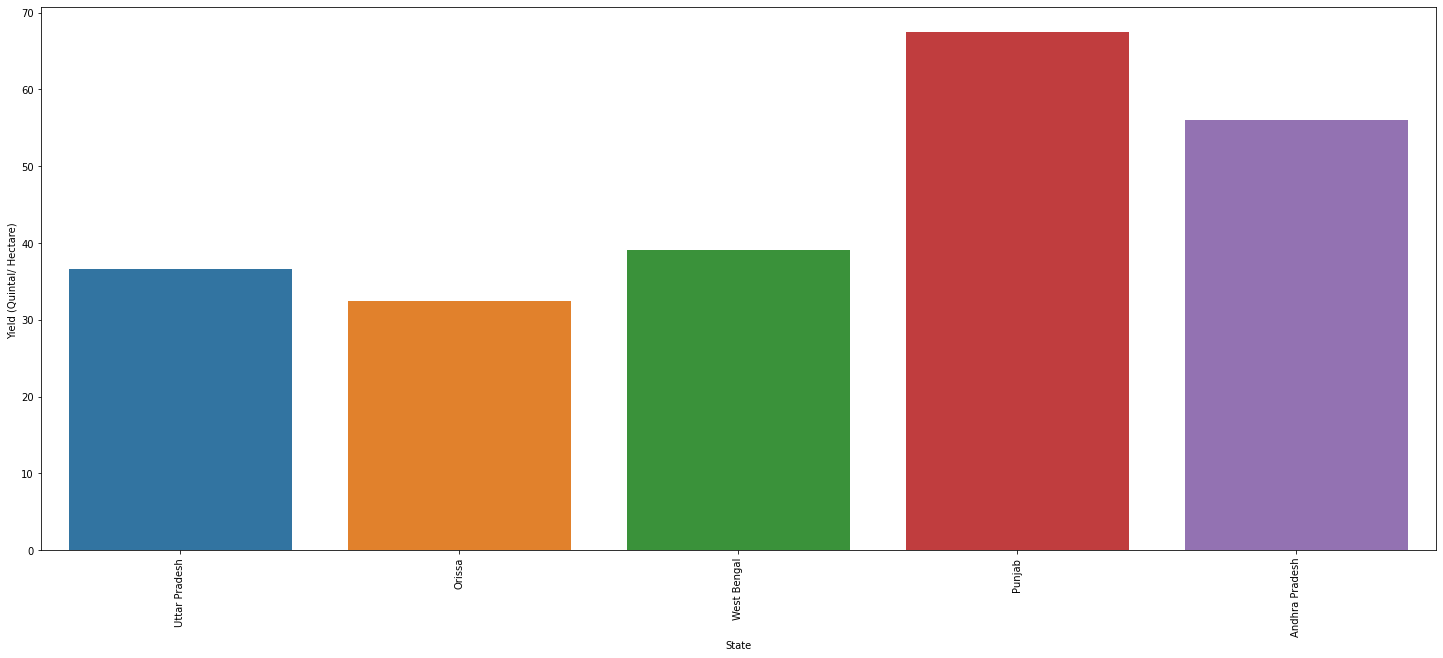

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(padd_df["State"],padd_df["Yield (Quintal/ Hectare) "])
plt.xticks(rotation=90) 
plt.show()

### Yield is much better in Punjab than UP ,and percentage increment in cost in punjab than UP is not so highso Punjab is better option for cultivation of paddy

 RAPSEED AND MUSTARD

In [ ]:
rap_df = df3[df3["Crop"]=="RAPESEED AND MUSTARD"]
print(rap_df.shape)
rap_df

(5, 6)


Crop           State  \
35  RAPESEED AND MUSTARD  Madhya Pradesh   
36  RAPESEED AND MUSTARD       Rajasthan   
37  RAPESEED AND MUSTARD   Uttar Pradesh   
38  RAPESEED AND MUSTARD         Gujarat   
39  RAPESEED AND MUSTARD         Haryana   

    Cost of Cultivation (`/Hectare) A2+FL  Cost of Cultivation (`/Hectare) C2  \
35                                8686.43                            17705.93   
36                               11385.70                            19259.84   
37                               12774.41                            22560.30   
38                               13740.64                            19083.55   
39                               14715.27                            27507.54   

    Cost of Production (`/Quintal) C2  Yield (Quintal/ Hectare)   
35                            1279.60                      12.94  
36                            1341.29                      13.54  
37                            1595.56                      13.57  
38                            1610.40                      11.61  
39                            1251.12                      19.94

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


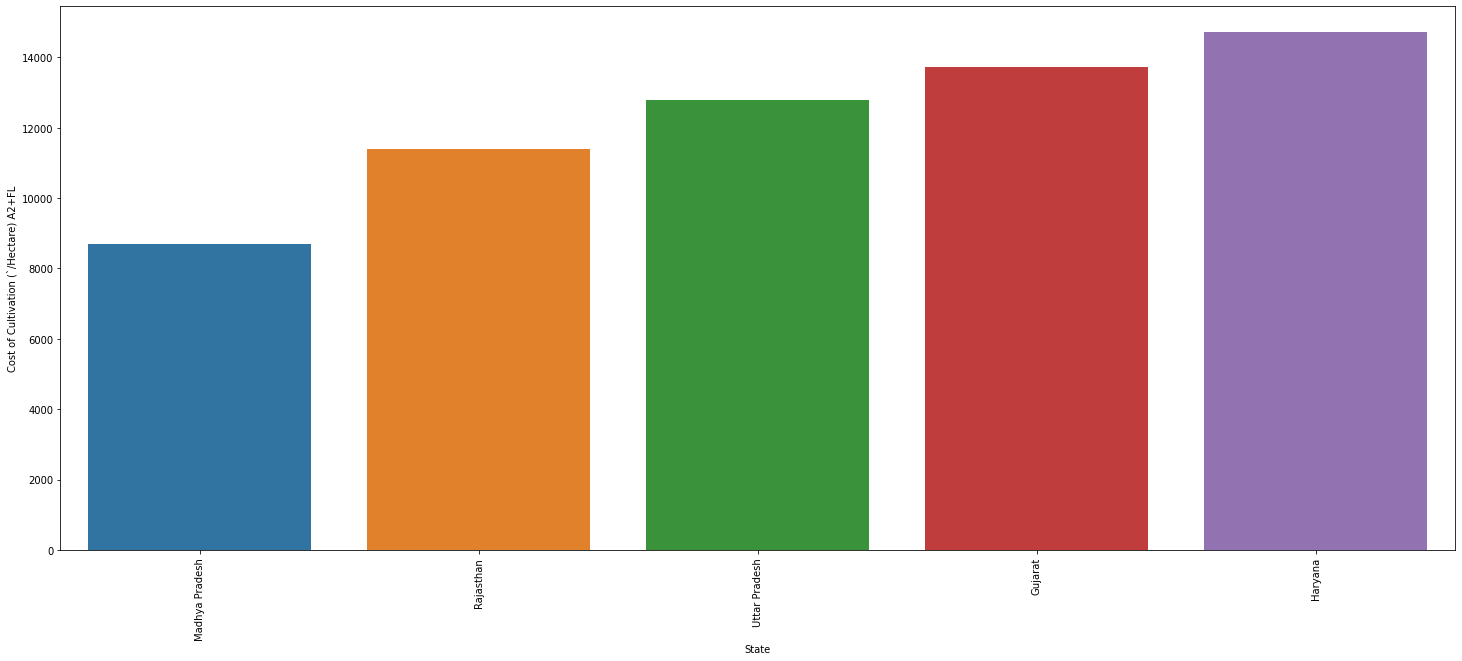

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(rap_df["State"],rap_df["Cost of Cultivation (`/Hectare) A2+FL"])
plt.xticks(rotation=90)
plt.show()

### Least cost of cultivation (A2+Fl)in MP

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(rap_df["State"],rap_df["Cost of Cultivation (`/Hectare) C2"])
plt.xticks(rotation=90)
plt.show()

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


### Least cost of cultivation including rent of land is equivalent in gujarat and MP but from previous Graph we have seen that if we exclude cost of rent than cost of cultivation is much lessin MP than in Gujarat that means the rent of land is much large compare to Gujarat in MP that's whyoverall C2 cost become equal 

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


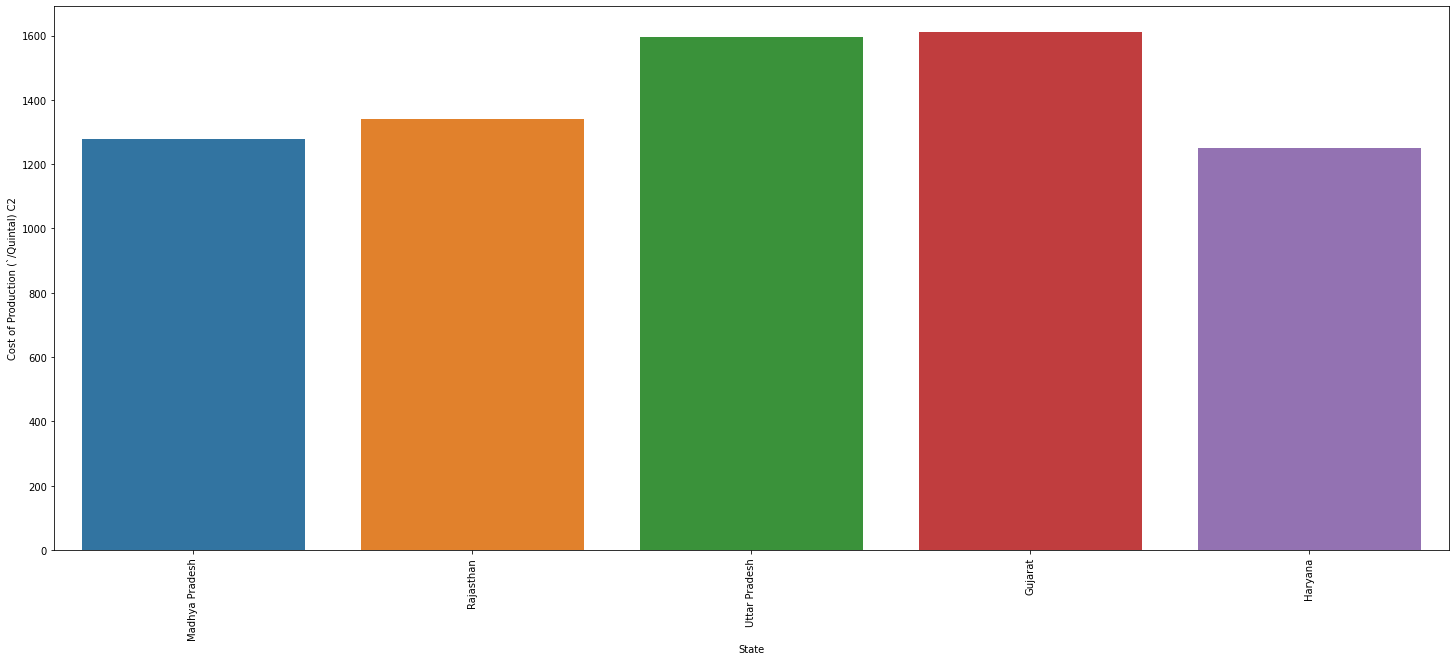

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(rap_df["State"],rap_df["Cost of Production (`/Quintal) C2"])
plt.xticks(rotation=90)
plt.show()

### Haryana has least cost of production now,yield is the decidability factor.

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(rap_df["State"],rap_df["Yield (Quintal/ Hectare) "])
plt.xticks(rotation=90) 
plt.show()

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


### As haryans has better yield than UP and increment of cost (A2+Fl) is equally incremented as percentage of Yieldcompared to UP so profit gained will be approx equal in MP and haryana but for best yield haryana is better for MUSTARD AND RAPSEED

In [ ]:
sug_df = df3[df3["Crop"]=="SUGARCANE"]
print(sug_df.shape)
sug_df

(5, 6)


Crop           State  Cost of Cultivation (`/Hectare) A2+FL  \
40  SUGARCANE   Uttar Pradesh                               24538.32   
41  SUGARCANE       Karnataka                               55655.44   
42  SUGARCANE  Andhra Pradesh                               56621.16   
43  SUGARCANE     Maharashtra                               57673.60   
44  SUGARCANE      Tamil Nadu                               66335.06   

    Cost of Cultivation (`/Hectare) C2  Cost of Production (`/Quintal) C2  \
40                            45239.51                              93.64   
41                            86765.77                              86.53   
42                            91442.63                             119.72   
43                            85801.95                             107.56   
44                            89025.27                              85.79   

    Yield (Quintal/ Hectare)   
40                     448.89  
41                     986.21  
42                     757.92  
43                     744.01  
44                    1015.45

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


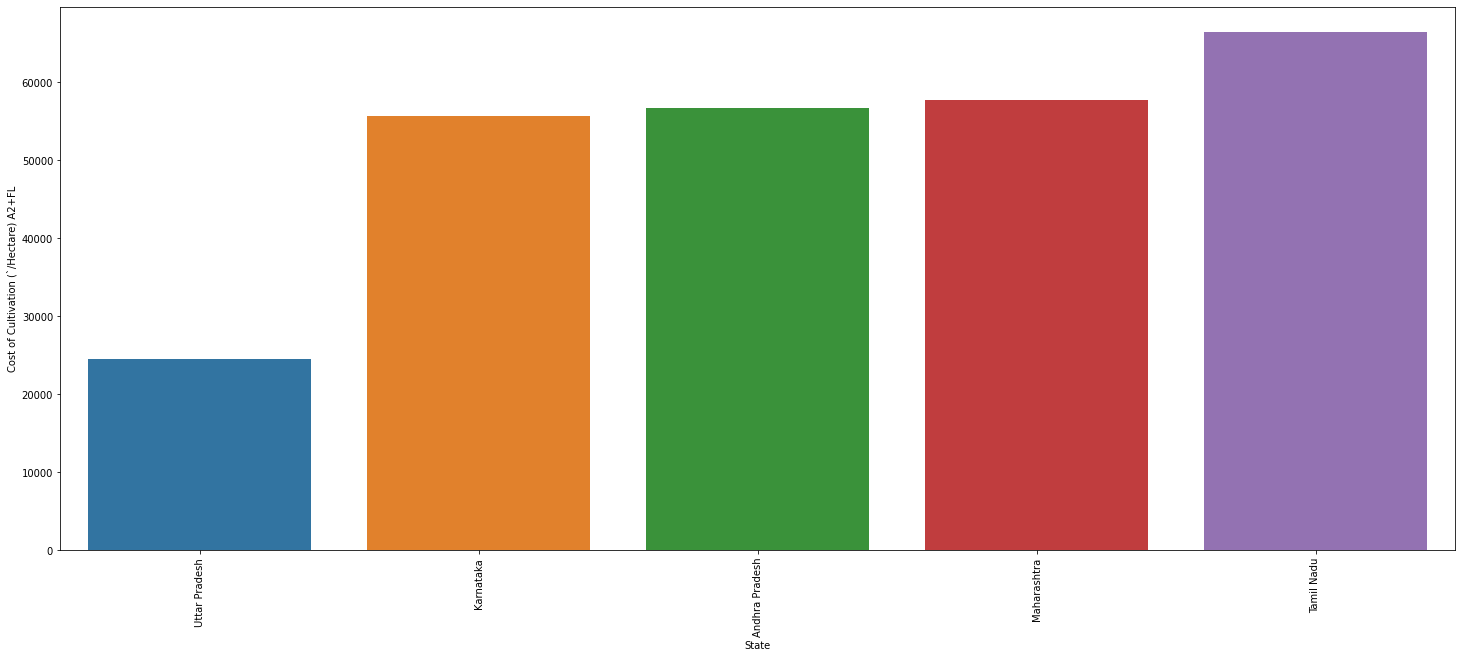

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(sug_df["State"],sug_df["Cost of Cultivation (`/Hectare) A2+FL"])
plt.xticks(rotation=90)
plt.show()

For SUGARCANE UP has least cost of cultivation

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(sug_df["State"],sug_df["Cost of Cultivation (`/Hectare) C2"])
plt.xticks(rotation=90)
plt.show()

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


### Including rent cost also UP has least  cost of cultivation

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


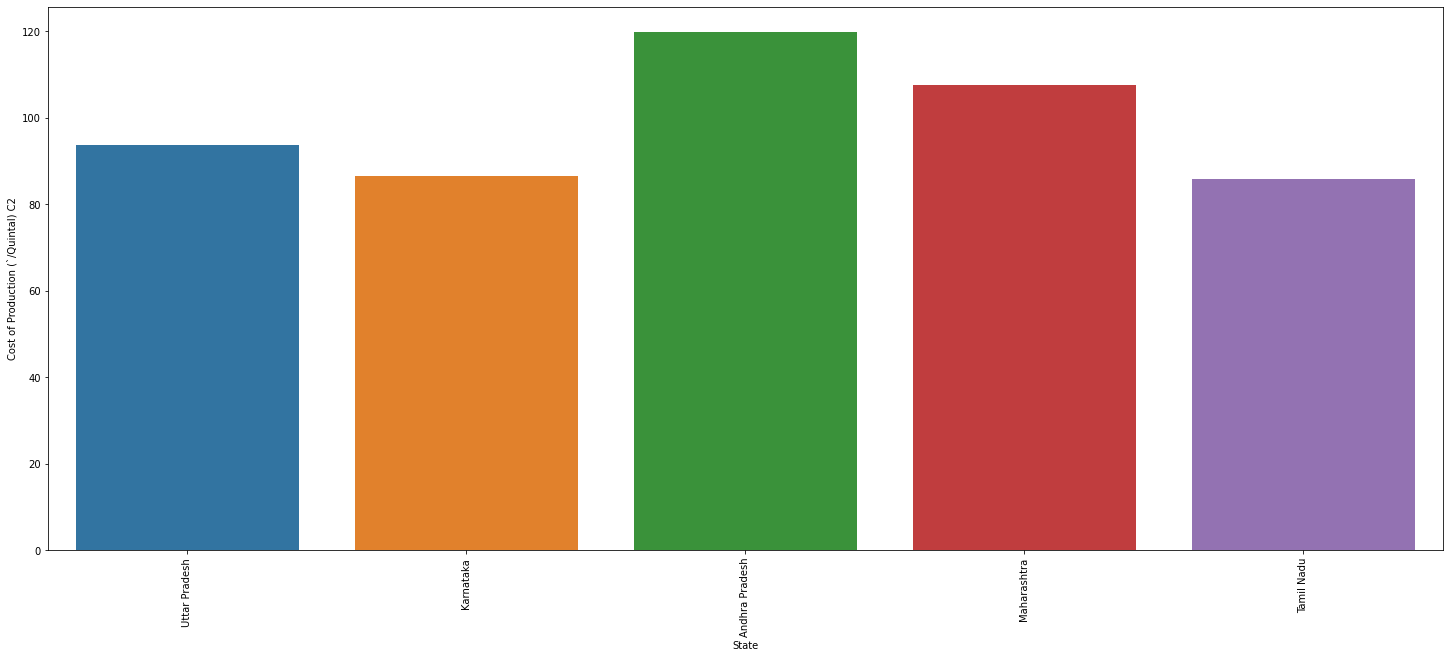

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(sug_df["State"],sug_df["Cost of Production (`/Quintal) C2"])
plt.xticks(rotation=90)
plt.show()

### UP has cost  of production little bit more than karnatka , but cost of cultivation is too high in karnatka compare to UP

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


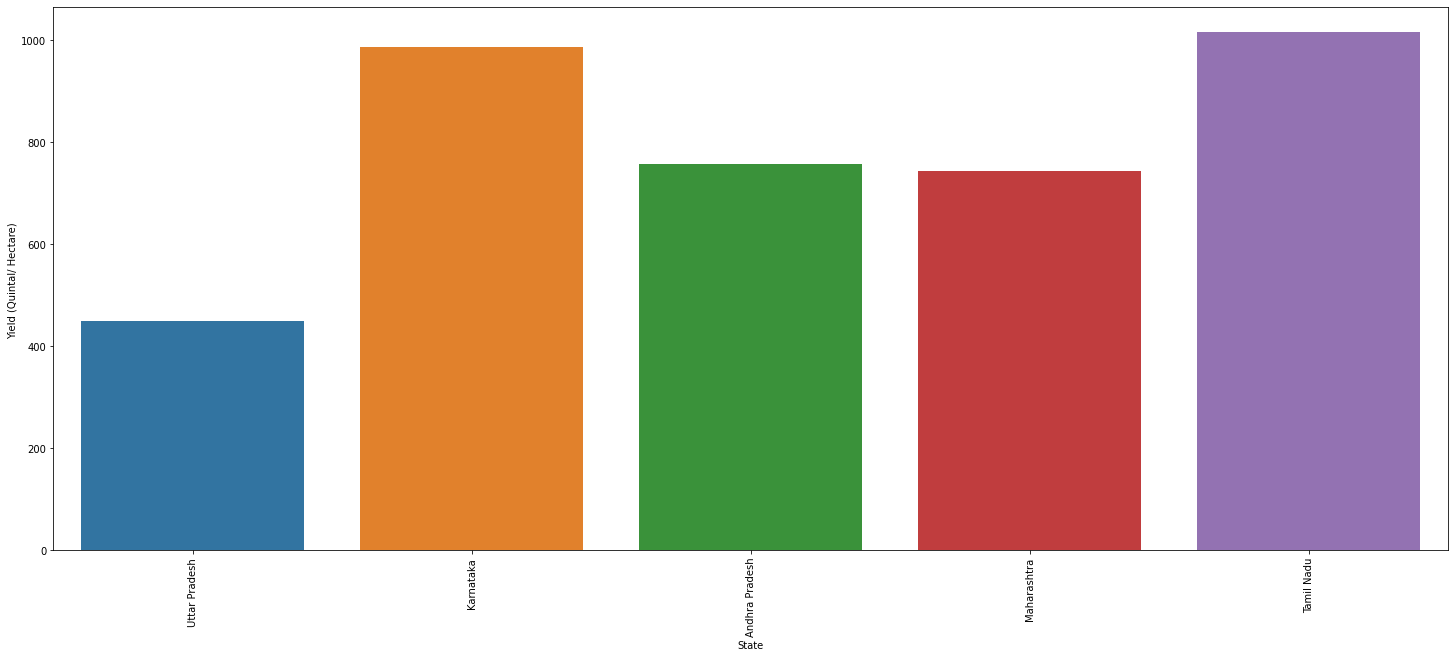

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(sug_df["State"],sug_df["Yield (Quintal/ Hectare) "])
plt.xticks(rotation=90) 
plt.show()

### But Yield is also much better in karnatka than UP so Karnatka is better option

In [ ]:
whe_df = df3[df3["Crop"]=="WHEAT"]
print(whe_df.shape)
whe_df

(4, 6)


Crop           State  Cost of Cultivation (`/Hectare) A2+FL  \
45  WHEAT  Madhya Pradesh                               12464.40   
46  WHEAT          Punjab                               17945.58   
47  WHEAT   Uttar Pradesh                               18979.38   
48  WHEAT       Rajasthan                               19119.08   

    Cost of Cultivation (`/Hectare) C2  Cost of Production (`/Quintal) C2  \
45                            22489.75                             810.25   
46                            35423.48                             804.80   
47                            31902.74                             769.84   
48                            29876.36                             683.58   

    Yield (Quintal/ Hectare)   
45                      23.59  
46                      39.83  
47                      34.99  
48                      37.19

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


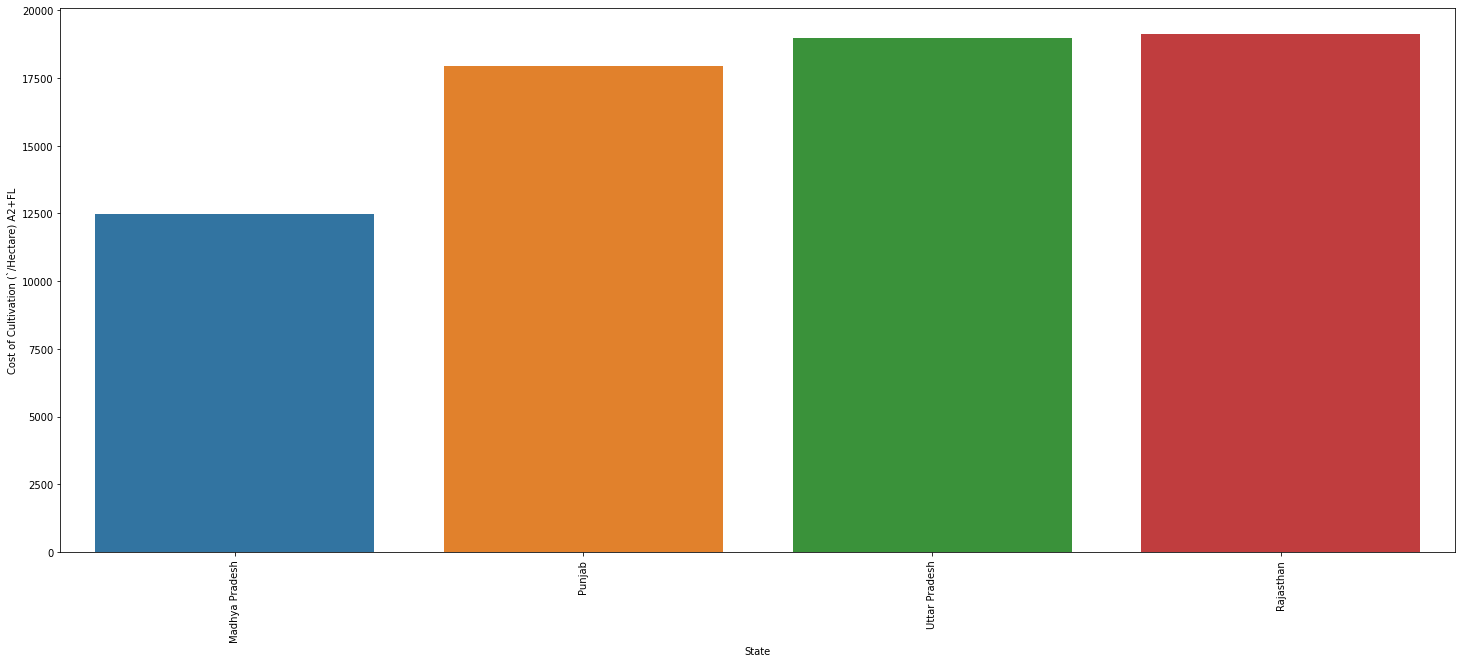

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(whe_df["State"],whe_df["Cost of Cultivation (`/Hectare) A2+FL"])
plt.xticks(rotation=90)
plt.show()

### MP has least cost of cultivation for Wheat

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


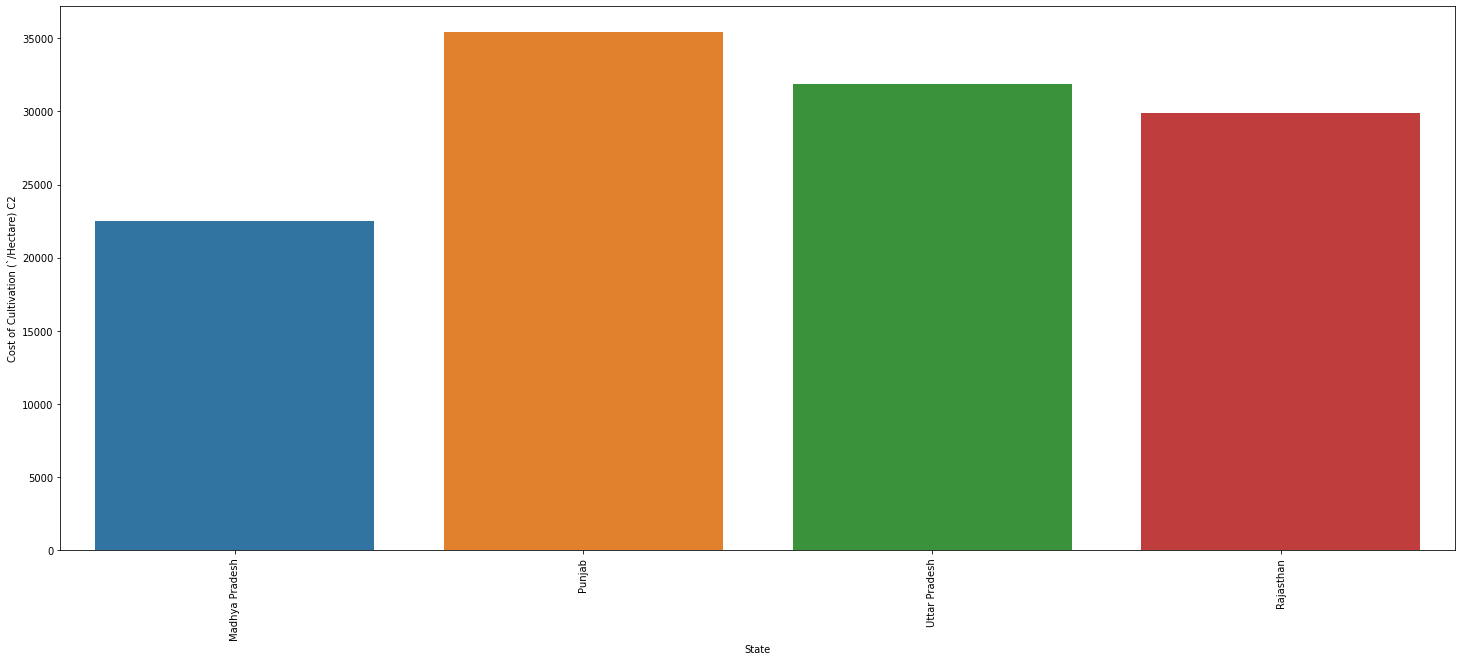

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(whe_df["State"],whe_df["Cost of Cultivation (`/Hectare) C2"])
plt.xticks(rotation=90)
plt.show()

### Including rent cost cost MP has leat cost

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


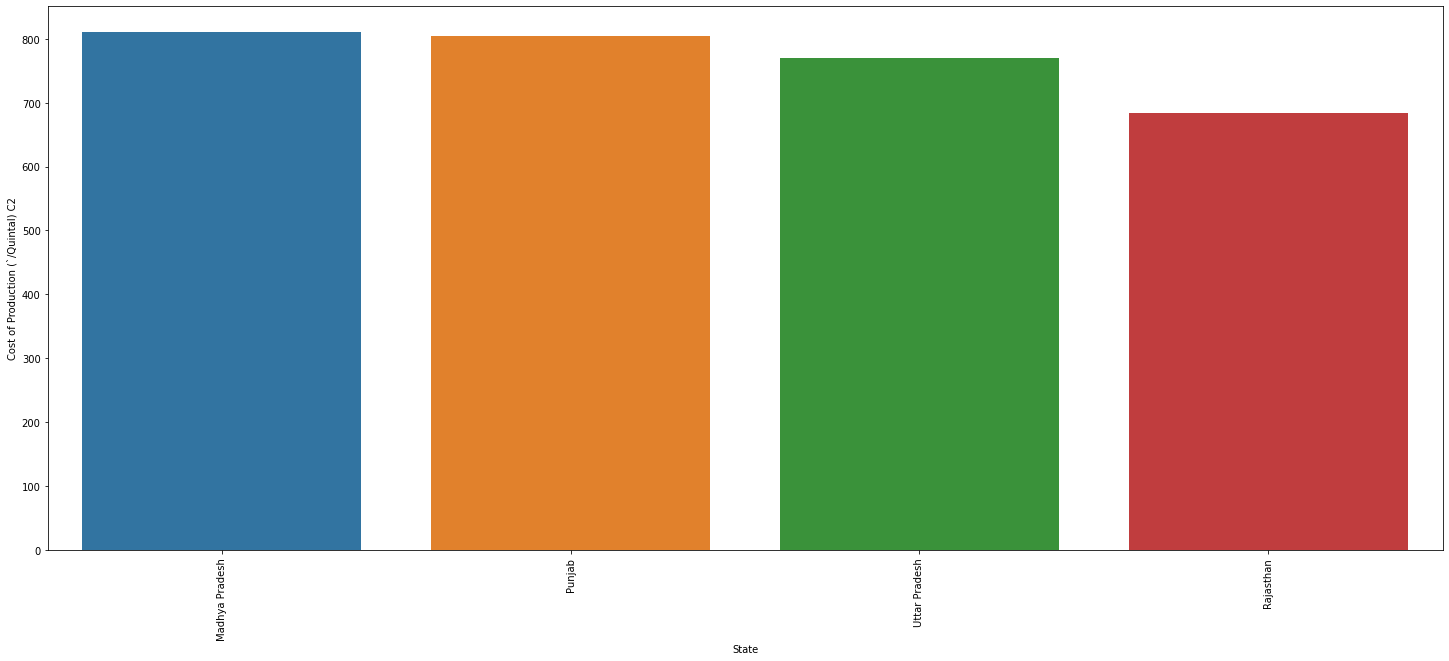

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(whe_df["State"],whe_df["Cost of Production (`/Quintal) C2"])
plt.xticks(rotation=90)
plt.show()

### Production cost is least in Rajasthan and little bit  less in UP than MP and Punjab

C:\Users\lenovo\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


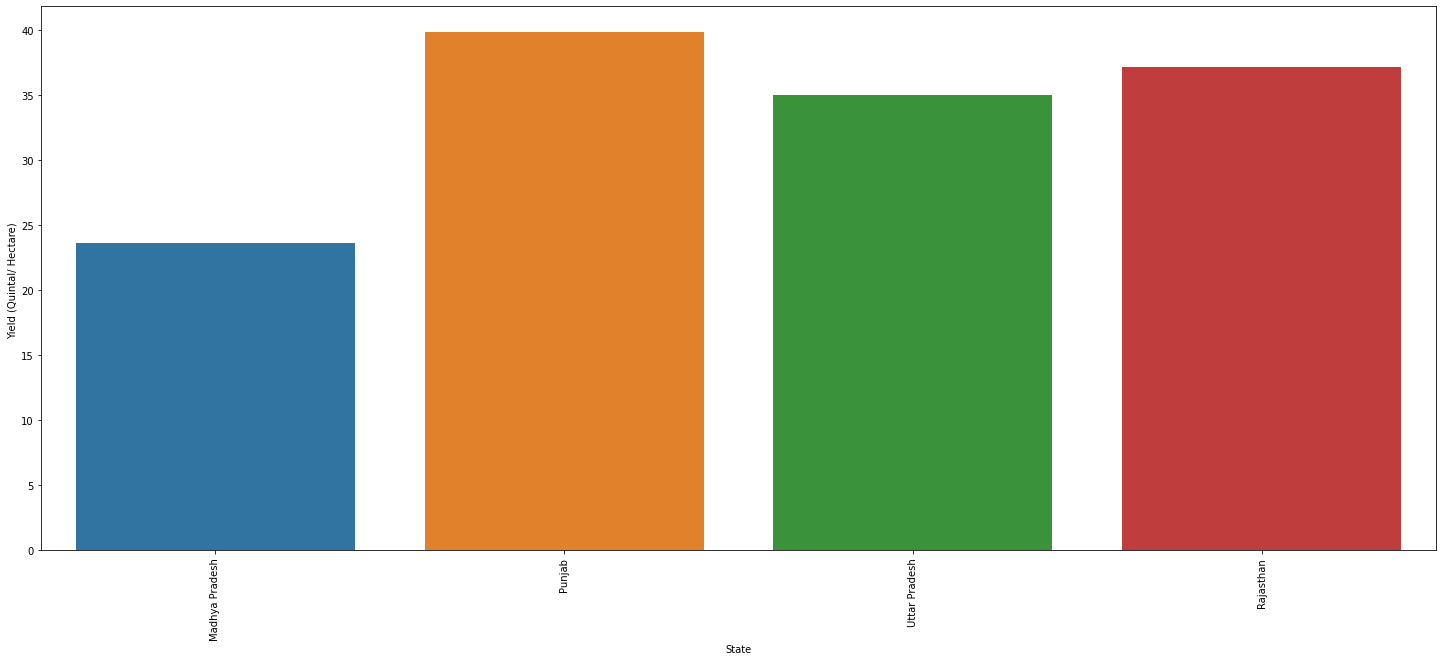

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(whe_df["State"],whe_df["Yield (Quintal/ Hectare) "])
plt.xticks(rotation=90) 
plt.show()

### Punjab has better yield of wheat ,and Rajasthan is at second no. and if we compare the cost profit will be almost equalin rajasthan and Punjab so ,Punjab is most popular for wheat and at second No. RAJASTHAN.

# -------------------------------------------------------

# Analaysis of dataset 2

reading files

In [ ]:
df2=pd.read_csv(r'C:\Users\PC\Downloads\cpdata.csv')

checking the names of columns they contain

In [ ]:
print(df2.columns)

Index(['temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


 # df2 dataframe has 5 columns among which label is our target, which contains name of the crops.

# data preprocessing

In [ ]:
df2.head(10)

temperature   humidity        ph    rainfall label
0    20.879744  82.002744  6.502985  202.935536  rice
1    21.770462  80.319644  7.038096  226.655537  rice
2    23.004459  82.320763  7.840207  263.964248  rice
3    26.491096  80.158363  6.980401  242.864034  rice
4    20.130175  81.604873  7.628473  262.717340  rice
5    23.058049  83.370118  7.073454  251.055000  rice
6    22.708838  82.639414  5.700806  271.324860  rice
7    20.277744  82.894086  5.718627  241.974195  rice
8    24.515881  83.535216  6.685346  230.446236  rice
9    23.223974  83.033227  6.336254  221.209196  rice

to get an idea of what kind of values the dataset contain, we have printed first 10 rows of our dataset using head() function

In [ ]:
df2.isnull().value_counts()

temperature  humidity  ph     rainfall  label
False        False     False  False     False    3100
dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  3100 non-null   float64
 1   humidity     3100 non-null   float64
 2   ph           3100 non-null   float64
 3   rainfall     3100 non-null   float64
 4   label        3100 non-null   object 
dtypes: float64(4), object(1)
memory usage: 121.2+ KB


# from above we can say that there is no null value present in the dataset

In [ ]:
df2.describe()

temperature     humidity           ph     rainfall
count  3100.000000  3100.000000  3100.000000  3100.000000
mean     27.108466    66.005312     6.368913   110.213031
std       7.566308    24.007713     0.809477    64.048562
min       8.825675    10.034048     3.504752    20.211267
25%      22.810495    55.244920     5.895343    64.909095
50%      26.102848    68.980529     6.342518    97.057093
75%      29.365644    84.446524     6.841616   141.210784
max      54.986760    99.981876     9.935091   397.315380

from above we can say that all crops are grown between ph range from 3.5 to 9.9

maximum temp is 54.9 and 8.82 as minimum

humidity should be more than 10.03 for a crop to be grown

rainfall must be above 20.2 for a crop to be grown

In [ ]:
df2['label'].value_counts()

rice            100
Moth Beans      100
pomegranate     100
papaya          100
orange          100
muskmelon       100
mango           100
apple           100
grapes          100
banana          100
Chickpea        100
Pigeon Peas     100
Adzuki Beans    100
Black gram      100
Coconut         100
Kidney Beans    100
wheat           100
Tobacco         100
Sugarcane       100
Rubber          100
Peas            100
Ground Nut      100
Cotton          100
Coffee          100
Jute            100
Lentil          100
maize           100
millet          100
Tea             100
Mung Bean       100
watermelon      100
Name: label, dtype: int64

Here, we have counted the values of crop's occurences

In [ ]:
ndf1=df2.loc[(df2['ph']<=7)]
ndf1['label'].value_counts()

Kidney Beans    100
Rubber          100
papaya          100
muskmelon       100
mango           100
apple           100
grapes          100
banana          100
Coconut         100
wheat           100
Tobacco         100
watermelon      100
Peas            100
Ground Nut      100
Tea             100
maize           100
Pigeon Peas      89
pomegranate      84
Adzuki Beans     84
Mung Bean        78
rice             73
Coffee           68
Jute             64
millet           62
Cotton           55
Sugarcane        52
Lentil           52
orange           49
Moth Beans       48
Black gram       36
Chickpea         36
Name: label, dtype: int64

From above we can say that Kidney Beans, Rubber, papaya ,muskmelon ,mango ,apple ,grapes ,banana ,Coconut ,wheat ,Tobacco ,watermelon ,Peas ,Ground Nut ,Tea ,maize
These crops grow in acidic environment only.
Pigeon Peas,
pomegranate,
Adzuki Beans,
Mung Bean,
rice,
Coffee,
Jute,
millet,
Cotton,
Sugarcane,
Lentil
These crops are grown mostly in acidic environment and sometimes can be grown in basic too.
While orange, Moth Beans, Black gram and Chickpea are mostly grown in basic environment and sometimes in acidic too.</b>

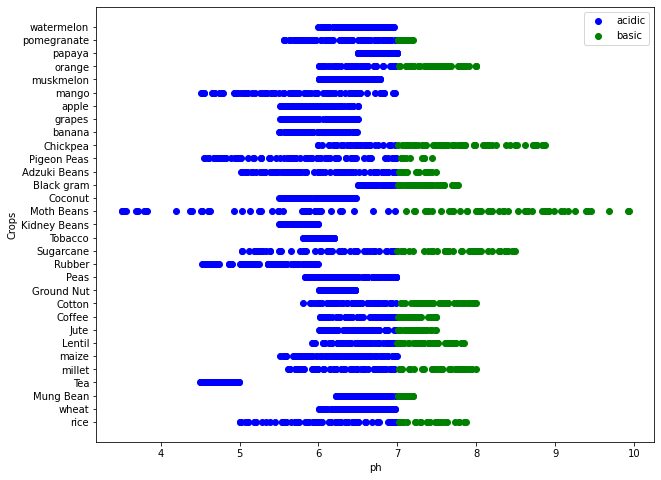

In [ ]:
ndf2=df2.loc[(df2['ph']>7)]
ndf2['label'].value_counts()

plt.figure(figsize=(10,8))
plt.scatter(ndf1['ph'],ndf1['label'],color='b',label='acidic')
plt.scatter(ndf2['ph'],ndf2['label'],color='g',label='basic')
plt.xlabel('ph')
plt.ylabel('Crops')
plt.legend()
plt.show()

# From above we can say that Kidney Beans, Rubber, papaya ,muskmelon ,mango ,apple ,grapes ,banana ,Coconut ,wheat ,Tobacco ,watermelon ,Peas ,Ground Nut ,Tea ,maize
# These crops grow in acidic environment only.
# Moth Beans can be grown in widest range of ph that is from 3.5 to 9.9

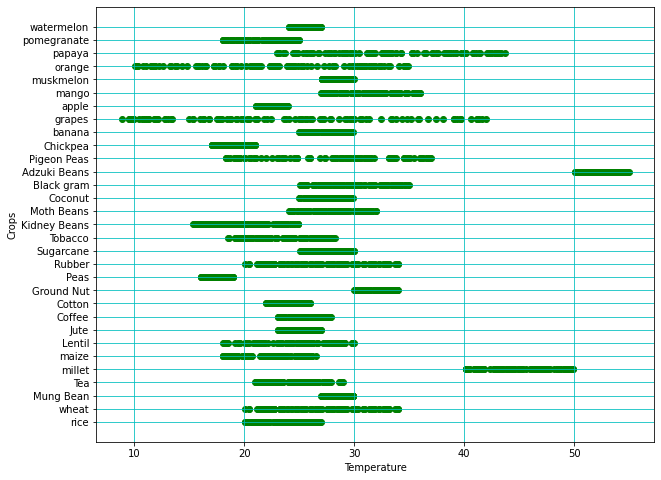

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(df2['temperature'],df2['label'],color='g')
plt.xlabel('Temperature')
plt.ylabel('Crops')
plt.grid(True,color='c')

From above plot, we can say that 

Adzuki Beans is the crop which is grown in highest temperature

grapes can be grown in less than 10°C temperature

grapes can be grown in a widest range of temperature

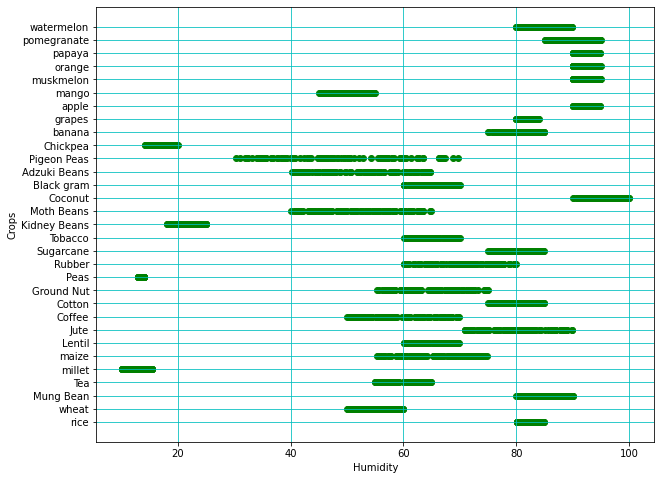

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(df2['humidity'],df2['label'],color='g')
plt.xlabel('Humidity')
plt.ylabel('Crops')
plt.grid(True,color='c')

From above plot, we can say that

Among these crops, coconut requires highest amount of humidity in the environment to be grown

While, milet can be grown in lowest amount of humidity in the environment

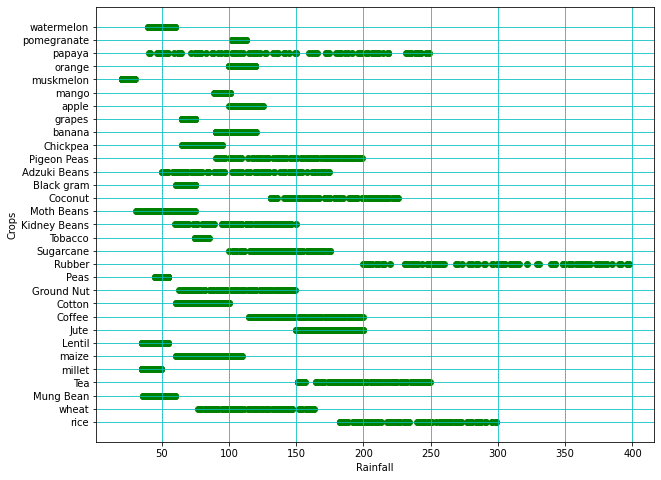

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(df2['rainfall'],df2['label'],color='g')
plt.xlabel('Rainfall')
plt.ylabel('Crops')
plt.grid(True,color='c')

Rubber requires very high amount of rainfall (between 200 to 400 )

Rice also requires high amount of rain (ranging between 180 to 300 )

While,
muskmelon can be grown in very low amount of rain (less than 50 )


# ----------------------------------------------------------

# Analaysis of dataset 5

In [ ]:
df5=pd.read_csv(r'C:\Users\lenovo\Downloads\cropproductiononvariousfactors.csv')

In [ ]:
df5.head()

Rainfall  Temperature   Ph   Crop  Production Cropconversion
0  400.15082         20.0  3.0  Bajra     0.00690          Bajra
1  400.16331         20.0  3.2  Bajra     0.00747          Bajra
2  400.16387         20.0  3.2  Bajra     0.00749          Bajra
3  400.17967         20.0  3.2  Bajra     0.00822          Bajra
4  400.19582         20.0  3.2  Bajra     0.00895          Bajra

In [ ]:
df5.shape

(189232, 6)

In [ ]:
df5.columns

Index(['Rainfall', 'Temperature', 'Ph', 'Crop', 'Production',
       'Cropconversion'],
      dtype='object')

In [ ]:
df5.isnull().value_counts()

Rainfall  Temperature  Ph     Crop   Production  Cropconversion
False     False        False  False  False       False             189232
dtype: int64

In [ ]:
df5.drop_duplicates(inplace=True,keep="first")
df5.shape

(170998, 6)

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170998 entries, 0 to 189231
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Rainfall        170998 non-null  float64
 1   Temperature     170998 non-null  float64
 2   Ph              170998 non-null  float64
 3   Crop            170998 non-null  object 
 4   Production      170998 non-null  float64
 5   Cropconversion  170998 non-null  object 
dtypes: float64(4), object(2)
memory usage: 9.1+ MB


<b>from above we can say that there is no null value present in the dataset</b>

In [ ]:
df5.describe()

Rainfall    Temperature             Ph     Production
count  170998.000000  170998.000000  170998.000000  170998.000000
mean      690.676500      25.252404       6.325882       5.255823
std       285.335131       4.631408       0.777913      14.446002
min       100.003400       7.000000       3.000000       0.000340
25%       514.693697      22.051723       5.800000       0.593220
50%       627.942830      25.000000       6.300000       1.203515
75%       769.655170      28.260000       6.800000       3.044385
max      3000.000000      39.045000       8.800000     955.750340

In [ ]:
df5.loc[(df5['Crop']==df5['Cropconversion'])].shape

(170998, 6)

from above we can say that, both the columns 'Crop' and 'Cropconversion' contains the same values so, we can drop one

In [ ]:
df5.drop('Cropconversion',inplace=True,axis=1)
df5

Rainfall  Temperature   Ph   Crop  Production
0       400.15082         20.0  3.0  Bajra     0.00690
1       400.16331         20.0  3.2  Bajra     0.00747
2       400.16387         20.0  3.2  Bajra     0.00749
3       400.17967         20.0  3.2  Bajra     0.00822
4       400.19582         20.0  3.2  Bajra     0.00895
...           ...          ...  ...    ...         ...
189227  766.92202         23.0  6.0  Wheat    10.40000
189228  770.28486         27.0  6.0  Wheat    10.40000
189229  770.00000         26.0  6.1  Wheat    10.40000
189230  633.83459         22.0  6.2  Wheat    10.40000
189231  761.20623         22.0  6.2  Wheat    10.40000

[170998 rows x 5 columns]

In [ ]:
df5['Crop'].value_counts()

Rice                     13970
Maize                    12815
Moong(Green Gram)         8869
Groundnut                 8448
Urad                      7908
Wheat                     7814
Gram                      6974
Potato                    6832
Jowar                     6812
Sugarcane                 6767
Onion                     6508
Sesamum                   5948
Sunflower                 5066
Chillies                  4684
Bajra                     4247
Peas & beans (Pulses)     4117
Sweet potato              4073
Barley                    4034
Ragi                      3843
Linseed                   3796
Horse-gram                3486
Cotton                    3400
Ginger                    3127
Banana                    2755
Garlic                    2667
Turmeric                  2643
Soyabean                  2454
Coriander                 2050
Castor seed               1843
Mesta                     1740
Jute                      1423
Khesari                   1330
Sannhamp

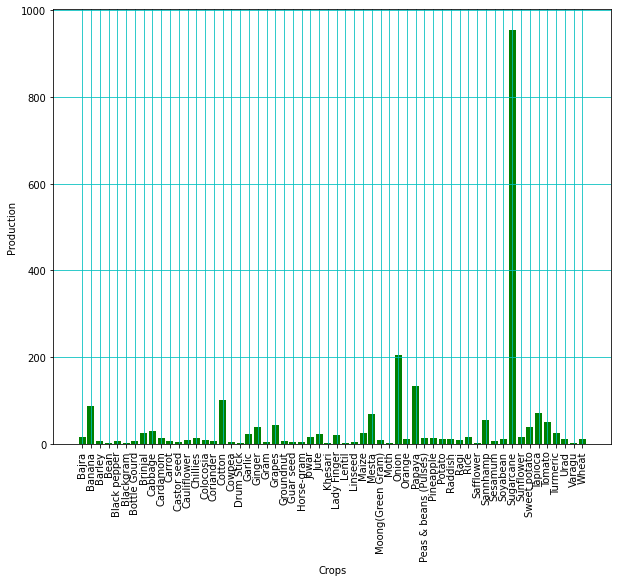

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df5['Crop'],df5['Production'],color='g')
plt.xticks(rotation='vertical')
plt.xlabel('Crops')
plt.ylabel('Production')
plt.grid(True,color='c')

From above plot, we can say that
<b>Among these crops, sugarcane is the crop which have highest production 
While, Lentil,khesari,varagu,bean,blackgram,cowpea and drum stick are the crops which have lowest production.</b>

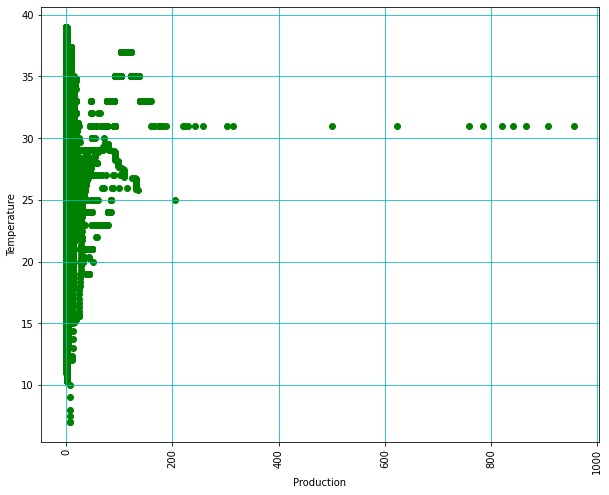

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(df5['Production'],df5['Temperature'],color='g')
plt.xticks(rotation='vertical')
plt.xlabel('Production')
plt.ylabel('Temperature')
plt.grid(True,color='c')

<b>By above plot we observe that if the temperature is above 30 than the production rate is maximum and if temperature is below 10 the production rate is minimum</b>

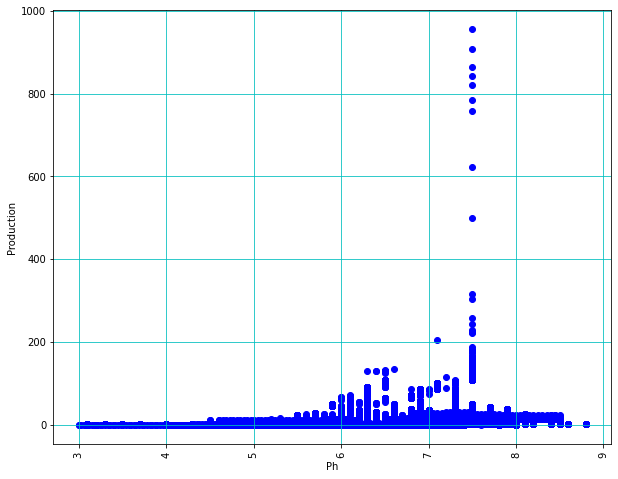

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(df5['Ph'],df5['Production'],color='b')
plt.xticks(rotation='vertical')
plt.xlabel('Ph')
plt.ylabel('Production')
plt.grid(True,color='c')

<b>By above plot we observe that if the Ph is above 7 than the production rate is maximum and if Ph is below 4 the production rate is minimum</b>

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(df5['Rainfall'],df5['Production'],color='b')
plt.xticks(rotation='vertical')
plt.xlabel('Production')
plt.ylabel('Temperature')
plt.grid(True,color='c')

###  For more accurate prescription, collect more metrics(features) from the user on which the crop yield is dependent, and then predict the crop to grow, along with the expected profit from that crop.

# Analysis of dataset 1st

In [ ]:
df = pd.read_csv('crop_production(Main).csv')

In [ ]:
df

State_Name District_Name  Crop_Year       Season  \
0       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
...                             ...           ...        ...          ...   
246086                  West Bengal       PURULIA       2014  Summer        
246087                  West Bengal       PURULIA       2014  Summer        
246088                  West Bengal       PURULIA       2014  Whole Year    
246089                  West Bengal       PURULIA       2014  Winter        
246090                  West Bengal       PURULIA       2014  Winter        

                       Crop      Area  Production  
0                  Arecanut    1254.0      2000.0  
1       Other Kharif pulses       2.0         1.0  
2                      Rice     102.0       321.0  
3                    Banana     176.0       641.0  
4                 Cashewnut     720.0       165.0  
...                     ...       ...         ...  
246086                 Rice     306.0       801.0  
246087              Sesamum     627.0       463.0  
246088            Sugarcane     324.0     16250.0  
246089                 Rice  279151.0    597899.0  
246090              Sesamum     175.0        88.0  

[246091 rows x 7 columns]

In [ ]:
df.shape

(246091, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [ ]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [ ]:
#Missing Data
ser = pd.isnull(df['Production'])

In [ ]:
df[ser]

State_Name   District_Name  Crop_Year       Season  \
46      Andaman and Nicobar Islands        NICOBARS       2005  Whole Year    
51      Andaman and Nicobar Islands        NICOBARS       2005  Whole Year    
623                  Andhra Pradesh       ANANTAPUR       2007  Kharif        
630                  Andhra Pradesh       ANANTAPUR       2007  Rabi          
698                  Andhra Pradesh       ANANTAPUR       2009  Rabi          
...                             ...             ...        ...          ...   
244128                  West Bengal  MEDINIPUR WEST       2010  Rabi          
244581                  West Bengal     MURSHIDABAD       2006  Kharif        
245606                  West Bengal         PURULIA       2001  Rabi          
245644                  West Bengal         PURULIA       2002  Rabi          
245865                  West Bengal         PURULIA       2008  Rabi          

                         Crop     Area  Production  
46                   Arecanut   795.67         NaN  
51               Dry chillies    17.00         NaN  
623         Moong(Green Gram)  1000.00         NaN  
630                Horse-gram  1000.00         NaN  
698         Rapeseed &Mustard     8.00         NaN  
...                       ...      ...         ...  
244128  Peas & beans (Pulses)     2.00         NaN  
244581      Moong(Green Gram)   200.00         NaN  
245606      Rapeseed &Mustard   427.00         NaN  
245644      Rapeseed &Mustard   522.00         NaN  
245865                Khesari     2.00         NaN  

[3730 rows x 7 columns]

In [ ]:
df['Production'].median()

729.0

In [ ]:
df['Production'].mean()

582503.4422509839

#### There is too much difference between the mean and median values of Production columns and we also Production depends on the State, Season, Crop and all so we have to drop these null rows

In [ ]:
# Dropping missing values
df = df.dropna()

In [ ]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [ ]:
df.shape

(242361, 7)

#### Yield-Crop yield is a standard measurement of the amount of agricultural production harvested—yield of a crop—per unit of land area.

In [ ]:
df['Yield'] = df['Production']/df['Area']

C:\Users\admin\AppData\Local\Temp\ipykernel_4392\688263902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Yield'] = df['Production']/df['Area']


In [ ]:
df

State_Name District_Name  Crop_Year       Season  \
0       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
...                             ...           ...        ...          ...   
246086                  West Bengal       PURULIA       2014  Summer        
246087                  West Bengal       PURULIA       2014  Summer        
246088                  West Bengal       PURULIA       2014  Whole Year    
246089                  West Bengal       PURULIA       2014  Winter        
246090                  West Bengal       PURULIA       2014  Winter        

                       Crop      Area  Production      Yield  
0                  Arecanut    1254.0      2000.0   1.594896  
1       Other Kharif pulses       2.0         1.0   0.500000  
2                      Rice     102.0       321.0   3.147059  
3                    Banana     176.0       641.0   3.642045  
4                 Cashewnut     720.0       165.0   0.229167  
...                     ...       ...         ...        ...  
246086                 Rice     306.0       801.0   2.617647  
246087              Sesamum     627.0       463.0   0.738437  
246088            Sugarcane     324.0     16250.0  50.154321  
246089                 Rice  279151.0    597899.0   2.141848  
246090              Sesamum     175.0        88.0   0.502857  

[242361 rows x 8 columns]

In [ ]:
value_count = ['State_Name','District_Name','Crop_Year','Season','Crop']

In [ ]:
for i in value_count:
    print(df[i].value_counts())

Uttar Pradesh                  33189
Madhya Pradesh                 22604
Karnataka                      21079
Bihar                          18874
Assam                          14622
Odisha                         13524
Tamil Nadu                     13266
Maharashtra                    12496
Rajasthan                      12066
Chhattisgarh                   10368
West Bengal                     9597
Andhra Pradesh                  9561
Gujarat                         8365
Telangana                       5591
Uttarakhand                     4825
Haryana                         4540
Kerala                          4003
Nagaland                        3904
Punjab                          3143
Meghalaya                       2867
Arunachal Pradesh               2545
Himachal Pradesh                2456
Jammu and Kashmir               1632
Tripura                         1412
Manipur                         1266
Jharkhand                       1266
Mizoram                          954
P

<AxesSubplot:xlabel='Area', ylabel='Production'>

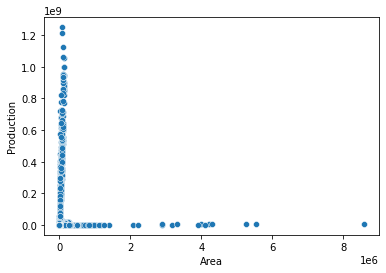

In [ ]:
sns.scatterplot(x='Area',y='Production',data=df)

In the above graph we can't find accurate outliers so we will check outliers later below with repect to each crop present in the dataset

In [ ]:
# Group all the columns with respect to the States
grpBy_states = df.groupby(['State_Name','District_Name']).mean()[['Area','Production','Yield']]

In [ ]:
grpBy_states

Area  \
State_Name                  District_Name                            
Andaman and Nicobar Islands NICOBARS                   1963.246623   
                            NORTH AND MIDDLE ANDAMAN   1490.199000   
                            SOUTH ANDAMANS             1505.452162   
Andhra Pradesh              ANANTAPUR                 23560.174745   
                            CHITTOOR                   7803.250639   
...                                                            ...   
West Bengal                 MEDINIPUR EAST            34205.028818   
                            MEDINIPUR WEST            32589.291339   
                            MURSHIDABAD               41076.184746   
                            NADIA                     40907.734483   
                            PURULIA                   10028.141287   

                                                        Production       Yield  
State_Name                  District_Name                                       
Andaman and Nicobar Islands NICOBARS                  6.502668e+06  394.793026  
                            NORTH AND MIDDLE ANDAMAN  1.548317e+06  300.524628  
                            SOUTH ANDAMANS            1.893270e+06  319.309285  
Andhra Pradesh              ANANTAPUR                 1.039561e+05  112.123286  
                            CHITTOOR                  4.784355e+05  112.445186  
...                                                            ...         ...  
West Bengal                 MEDINIPUR EAST            3.295917e+05   74.838166  
                            MEDINIPUR WEST            1.684548e+05   51.314032  
                            MURSHIDABAD               3.430005e+05   50.750355  
                            NADIA                     1.592654e+05   50.583199  
                            PURULIA                   2.199698e+04   35.676645  

[652 rows x 3 columns]

In [ ]:
plt.figure(figsize=(16,14))
sns.displot(x='Area',data=grpBy_states,hue='State_Name',bins=33,height=10)
plt.xticks(rotation=90)
plt.show()

<Figure size 1152x1008 with 0 Axes>

In [ ]:
grpBy_Season = df.groupby('Season').mean()[['Area','Production','Yield']]

In [ ]:
grpBy_Season    

Area    Production       Yield
Season                                             
Autumn        9750.322582  1.306567e+04    2.722770
Kharif       14884.625646  4.274334e+04    2.300026
Rabi         14327.525751  3.101100e+04    2.032057
Summer        5085.011926  1.152238e+04    2.810451
Whole Year    4537.021677  2.395012e+06  171.944906
Winter       36297.166965  7.182642e+04    6.117808

In [ ]:
df.head(2)

State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        

                  Crop    Area  Production     Yield  
0             Arecanut  1254.0      2000.0  1.594896  
1  Other Kharif pulses     2.0         1.0  0.500000

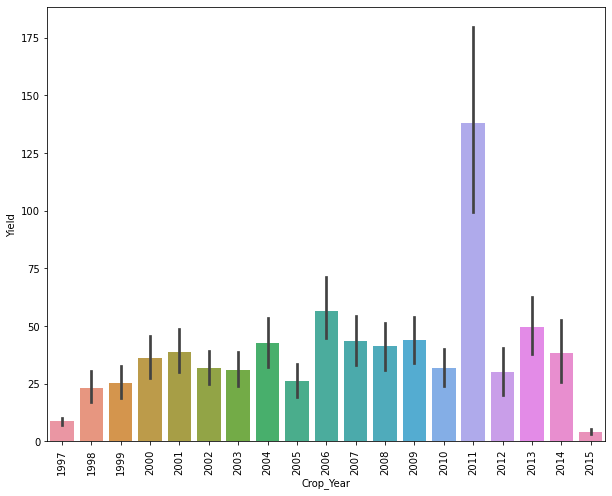

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(y='Yield',x='Crop_Year',data=df)
plt.xticks(rotation=90)
plt.show()

We can clearly see here that the Yield was highest in the year 2011

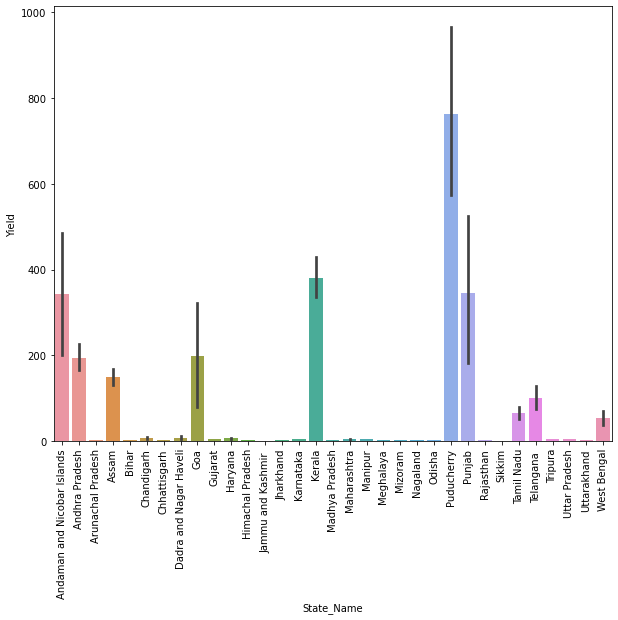

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(y='Yield',x='State_Name',data=df)
plt.xticks(rotation=90)
plt.show()

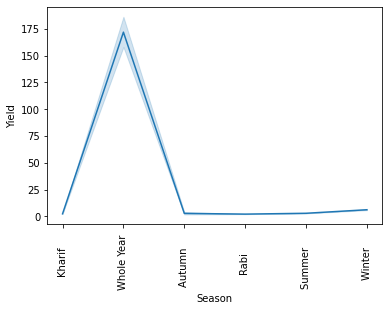

In [ ]:
sns.lineplot(x='Season',y='Yield',data=df)
plt.xticks(rotation=90)
plt.show()

#### Insights
Puducherry has the highest Yield i.e. Production per unit Area

In [ ]:
df['Crop'].value_counts()

Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
                     ...  
Litchi                   6
Coffee                   6
Apple                    4
Peach                    4
Other Dry Fruit          1
Name: Crop, Length: 124, dtype: int64

## Analysis based on each crop

### 1. Rice

In [ ]:
rice_df = df[df['Crop']=='Rice']

In [ ]:
rice_df

State_Name District_Name  Crop_Year       Season  \
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
12      Andaman and Nicobar Islands      NICOBARS       2001  Kharif        
18      Andaman and Nicobar Islands      NICOBARS       2002  Kharif        
27      Andaman and Nicobar Islands      NICOBARS       2003  Kharif        
36      Andaman and Nicobar Islands      NICOBARS       2004  Kharif        
...                             ...           ...        ...          ...   
246049                  West Bengal       PURULIA       2013  Summer        
246052                  West Bengal       PURULIA       2013  Winter        
246058                  West Bengal       PURULIA       2014  Autumn        
246086                  West Bengal       PURULIA       2014  Summer        
246089                  West Bengal       PURULIA       2014  Winter        

        Crop       Area  Production     Yield  
2       Rice     102.00      321.00  3.147059  
12      Rice      83.00      300.00  3.614458  
18      Rice     189.20      510.84  2.700000  
27      Rice      52.00       90.17  1.734038  
36      Rice      52.94       72.57  1.370797  
...      ...        ...         ...       ...  
246049  Rice     516.00     1274.00  2.468992  
246052  Rice  302274.00   730136.00  2.415477  
246058  Rice     264.00      721.00  2.731061  
246086  Rice     306.00      801.00  2.617647  
246089  Rice  279151.00   597899.00  2.141848  

[15082 rows x 8 columns]

In [ ]:
rice_df['Crop_Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2010, 2006, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [ ]:
rice_df

State_Name District_Name  Crop_Year       Season  \
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
12      Andaman and Nicobar Islands      NICOBARS       2001  Kharif        
18      Andaman and Nicobar Islands      NICOBARS       2002  Kharif        
27      Andaman and Nicobar Islands      NICOBARS       2003  Kharif        
36      Andaman and Nicobar Islands      NICOBARS       2004  Kharif        
...                             ...           ...        ...          ...   
246049                  West Bengal       PURULIA       2013  Summer        
246052                  West Bengal       PURULIA       2013  Winter        
246058                  West Bengal       PURULIA       2014  Autumn        
246086                  West Bengal       PURULIA       2014  Summer        
246089                  West Bengal       PURULIA       2014  Winter        

        Crop       Area  Production     Yield  
2       Rice     102.00      321.00  3.147059  
12      Rice      83.00      300.00  3.614458  
18      Rice     189.20      510.84  2.700000  
27      Rice      52.00       90.17  1.734038  
36      Rice      52.94       72.57  1.370797  
...      ...        ...         ...       ...  
246049  Rice     516.00     1274.00  2.468992  
246052  Rice  302274.00   730136.00  2.415477  
246058  Rice     264.00      721.00  2.731061  
246086  Rice     306.00      801.00  2.617647  
246089  Rice  279151.00   597899.00  2.141848  

[15082 rows x 8 columns]

In [ ]:
rice_df

State_Name District_Name  Crop_Year       Season  \
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
12      Andaman and Nicobar Islands      NICOBARS       2001  Kharif        
18      Andaman and Nicobar Islands      NICOBARS       2002  Kharif        
27      Andaman and Nicobar Islands      NICOBARS       2003  Kharif        
36      Andaman and Nicobar Islands      NICOBARS       2004  Kharif        
...                             ...           ...        ...          ...   
246049                  West Bengal       PURULIA       2013  Summer        
246052                  West Bengal       PURULIA       2013  Winter        
246058                  West Bengal       PURULIA       2014  Autumn        
246086                  West Bengal       PURULIA       2014  Summer        
246089                  West Bengal       PURULIA       2014  Winter        

        Crop       Area  Production     Yield  
2       Rice     102.00      321.00  3.147059  
12      Rice      83.00      300.00  3.614458  
18      Rice     189.20      510.84  2.700000  
27      Rice      52.00       90.17  1.734038  
36      Rice      52.94       72.57  1.370797  
...      ...        ...         ...       ...  
246049  Rice     516.00     1274.00  2.468992  
246052  Rice  302274.00   730136.00  2.415477  
246058  Rice     264.00      721.00  2.731061  
246086  Rice     306.00      801.00  2.617647  
246089  Rice  279151.00   597899.00  2.141848  

[15082 rows x 8 columns]

<AxesSubplot:xlabel='Area', ylabel='Production'>

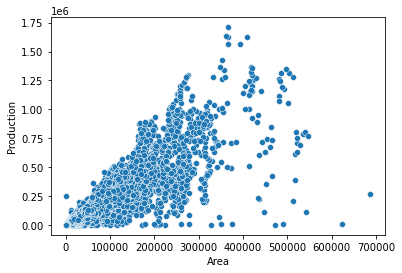

In [ ]:
sns.scatterplot(x='Area',y='Production',data=rice_df)

In [ ]:
rice_df[(rice_df['Area']>=600000) | (rice_df['Production']>=1500000)]

State_Name  District_Name  Crop_Year       Season  Crop      Area  \
2544    Andhra Pradesh  EAST GODAVARI       2014  Whole Year   Rice  394117.0   
9830    Andhra Pradesh  WEST GODAVARI       2014  Whole Year   Rice  409286.0   
147754          Odisha       BALANGIR       2012  Summer       Rice  623000.0   
148599          Odisha        BARGARH       2012  Summer       Rice  687000.0   
164219          Punjab        SANGRUR       2003  Kharif       Rice  366000.0   
164232          Punjab        SANGRUR       2004  Kharif       Rice  367000.0   
164245          Punjab        SANGRUR       2005  Kharif       Rice  367000.0   
164259          Punjab        SANGRUR       2006  Kharif       Rice  362000.0   

        Production     Yield  
2544     1563229.0  3.966408  
9830     1624324.0  3.968677  
147754     10000.0  0.016051  
148599    265000.0  0.385735  
164219   1566000.0  4.278689  
164232   1710000.0  4.659401  
164245   1625000.0  4.427793  
164259   1637000.0  4.522099

In [ ]:
rice_df[(rice_df['Area']>=600000) | (rice_df['Production']>=1500000)].index

Int64Index([2544, 9830, 147754, 148599, 164219, 164232, 164245, 164259], dtype='int64')

In [ ]:
rice_df.shape

(15082, 8)

In [ ]:
rice_df = rice_df.drop(rice_df[(rice_df['Area']>=600000) | (rice_df['Production']>=1500000)].index)

In [ ]:
rice_df.shape

(15074, 8)

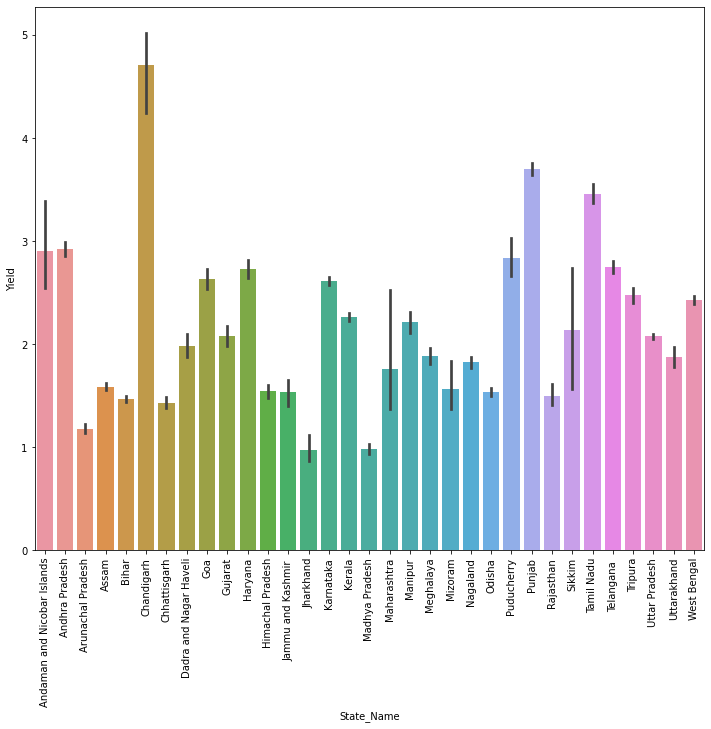

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x='State_Name',y='Yield',data=rice_df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
sns.lineplot("Crop_Year","Yield",data=rice_df)
plt.xticks(rotation=90)
plt.xticks([1997,2000,2003,2006,2009,2012,2015])
plt.xlim(1997,2015)
plt.plot()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

### Obeservations
Rabi crops are sown in winter from October to December and harvested in summer from April to June. Eg: wheat, barley, peas, gram and mustard. Kharif crops are grown with the onset of monsoon in different parts of the country and these are harvested in September-October.

1. Rice yield is maximum in Rabi season
2. Rice yield is maximum in Chandigarh.
3. Rice yield has been growing a little from the year 2011 to 2015.

### 2. Maize

In [ ]:
bins=[1997,2001,2006,2011,2016]
names = ['1997-2001','2001-2006','2006-2011','2011-2015']
df['Crop_5_year'] = pd.cut(df['Crop_Year'],bins,labels=names)


C:\Users\admin\AppData\Local\Temp\ipykernel_4392\1563246656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Crop_5_year'] = pd.cut(df['Crop_Year'],bins,labels=names)


In [ ]:
df

State_Name District_Name  Crop_Year       Season  \
0       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
...                             ...           ...        ...          ...   
246086                  West Bengal       PURULIA       2014  Summer        
246087                  West Bengal       PURULIA       2014  Summer        
246088                  West Bengal       PURULIA       2014  Whole Year    
246089                  West Bengal       PURULIA       2014  Winter        
246090                  West Bengal       PURULIA       2014  Winter        

                       Crop      Area  Production      Yield Crop_5_year  
0                  Arecanut    1254.0      2000.0   1.594896   1997-2001  
1       Other Kharif pulses       2.0         1.0   0.500000   1997-2001  
2                      Rice     102.0       321.0   3.147059   1997-2001  
3                    Banana     176.0       641.0   3.642045   1997-2001  
4                 Cashewnut     720.0       165.0   0.229167   1997-2001  
...                     ...       ...         ...        ...         ...  
246086                 Rice     306.0       801.0   2.617647   2011-2015  
246087              Sesamum     627.0       463.0   0.738437   2011-2015  
246088            Sugarcane     324.0     16250.0  50.154321   2011-2015  
246089                 Rice  279151.0    597899.0   2.141848   2011-2015  
246090              Sesamum     175.0        88.0   0.502857   2011-2015  

[242361 rows x 9 columns]

In [ ]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production          0
Yield               0
Crop_5_year      8899
dtype: int64

In [ ]:
df.shape

(242361, 9)

In [ ]:
df = df.dropna(axis=0,how='any')

In [ ]:
df.shape

(233462, 9)

In [ ]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
Yield            0
Crop_5_year      0
dtype: int64

In [ ]:
maize_df = df[df['Crop']=='Maize']

In [ ]:
maize_df

State_Name             District_Name  Crop_Year  \
71      Andaman and Nicobar Islands                  NICOBARS       2010   
120     Andaman and Nicobar Islands  NORTH AND MIDDLE ANDAMAN       2010   
194     Andaman and Nicobar Islands            SOUTH ANDAMANS       2010   
240                  Andhra Pradesh                 ANANTAPUR       1998   
251                  Andhra Pradesh                 ANANTAPUR       1998   
...                             ...                       ...        ...   
246013                  West Bengal                   PURULIA       2012   
246020                  West Bengal                   PURULIA       2013   
246048                  West Bengal                   PURULIA       2013   
246056                  West Bengal                   PURULIA       2014   
246085                  West Bengal                   PURULIA       2014   

             Season   Crop     Area  Production     Yield Crop_5_year  
71      Rabi         Maize     3.84       18.22  4.744792   2006-2011  
120     Rabi         Maize    86.70       96.40  1.111880   2006-2011  
194     Rabi         Maize    73.00      253.00  3.465753   2006-2011  
240     Kharif       Maize  3300.00     6700.00  2.030303   1997-2001  
251     Rabi         Maize   300.00     1600.00  5.333333   1997-2001  
...             ...    ...      ...         ...       ...         ...  
246013  Summer       Maize   290.00      476.00  1.641379   2011-2015  
246020  Autumn       Maize  6189.00    10665.00  1.723219   2011-2015  
246048  Summer       Maize   325.00      522.00  1.606154   2011-2015  
246056  Autumn       Maize  6317.00    13337.00  2.111287   2011-2015  
246085  Summer       Maize   325.00     2039.00  6.273846   2011-2015  

[13139 rows x 9 columns]

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x='Season',y='Yield',hue='Crop_5_year',data=maize_df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
sns.scatterplot(x='Area',y='Production',hue='Crop_5_year',data=maize_df)

<AxesSubplot:xlabel='Area', ylabel='Production'>

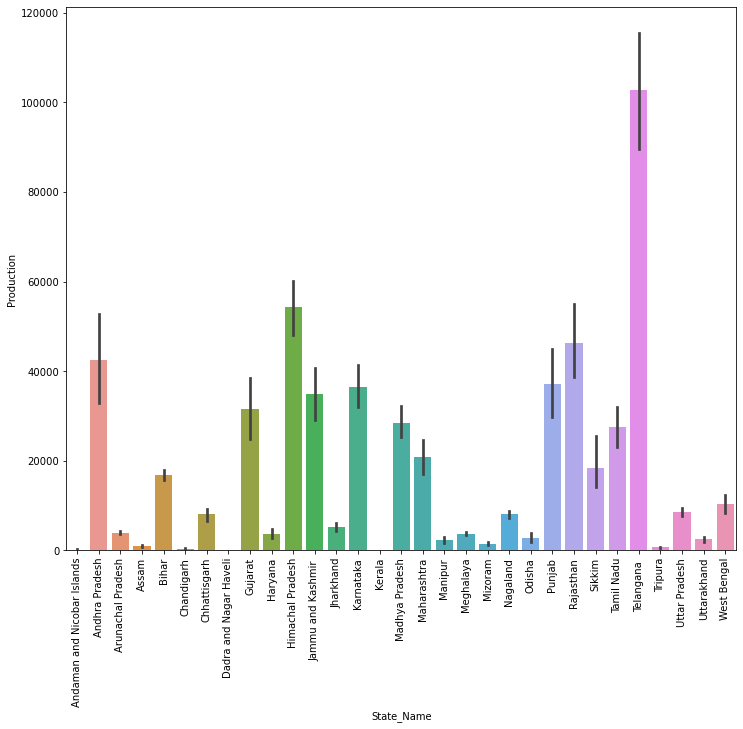

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x='State_Name',y='Production',data=maize_df)
plt.xticks(rotation=90)
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

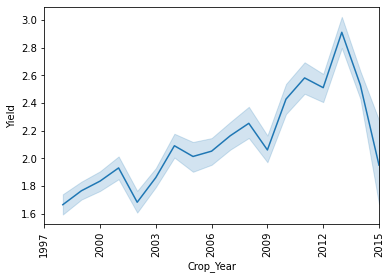

In [ ]:
sns.lineplot("Crop_Year","Yield",data=maize_df)
plt.xticks(rotation=90)
plt.xticks([1997,2000,2003,2006,2009,2012,2015])
plt.xlim(1997,2015)
plt.plot()

### Observations

1. Maize is produced in the autumn season
2. Telangana is the major maize-producing state.

### 3. Wheat

In [ ]:
wheat_df = df[df['Crop']=='Wheat']

In [ ]:
wheat_df

State_Name District_Name  Crop_Year       Season   Crop    Area  \
255     Andhra Pradesh     ANANTAPUR       1998  Rabi         Wheat   400.0   
284     Andhra Pradesh     ANANTAPUR       1999  Rabi         Wheat   439.0   
326     Andhra Pradesh     ANANTAPUR       2000  Rabi         Wheat   520.0   
372     Andhra Pradesh     ANANTAPUR       2001  Rabi         Wheat   307.0   
415     Andhra Pradesh     ANANTAPUR       2002  Rabi         Wheat   362.0   
...                ...           ...        ...          ...    ...     ...   
245949     West Bengal       PURULIA       2010  Rabi         Wheat  2013.0   
245980     West Bengal       PURULIA       2011  Rabi         Wheat  1880.0   
246012     West Bengal       PURULIA       2012  Rabi         Wheat  1648.0   
246047     West Bengal       PURULIA       2013  Rabi         Wheat  1187.0   
246084     West Bengal       PURULIA       2014  Rabi         Wheat  1622.0   

        Production     Yield Crop_5_year  
255          200.0  0.500000   1997-2001  
284          294.0  0.669704   1997-2001  
326          297.0  0.571154   1997-2001  
372          213.0  0.693811   1997-2001  
415          333.0  0.919890   2001-2006  
...            ...       ...         ...  
245949      5152.0  2.559364   2006-2011  
245980      4206.0  2.237234   2006-2011  
246012      3310.0  2.008495   2011-2015  
246047      2675.0  2.253580   2011-2015  
246084      3663.0  2.258323   2011-2015  

[7513 rows x 9 columns]

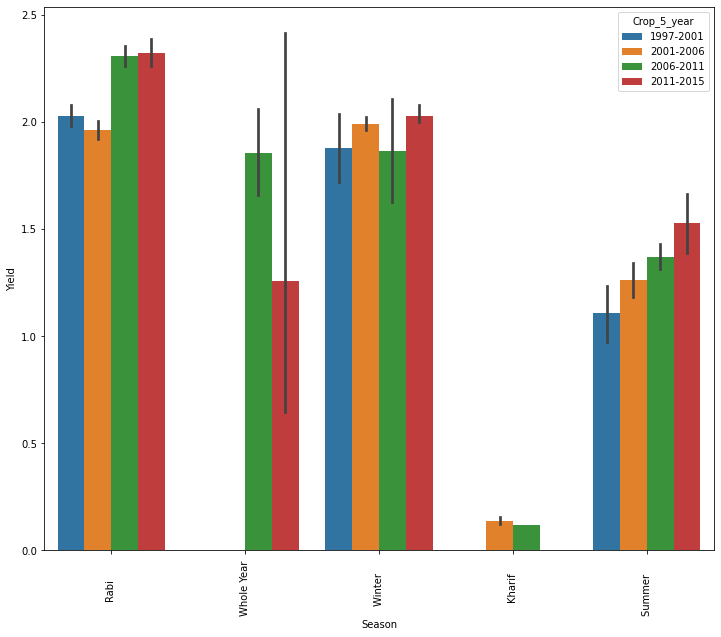

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x='Season',y='Yield',hue='Crop_5_year',data=wheat_df)
plt.xticks(rotation=90)
plt.show()

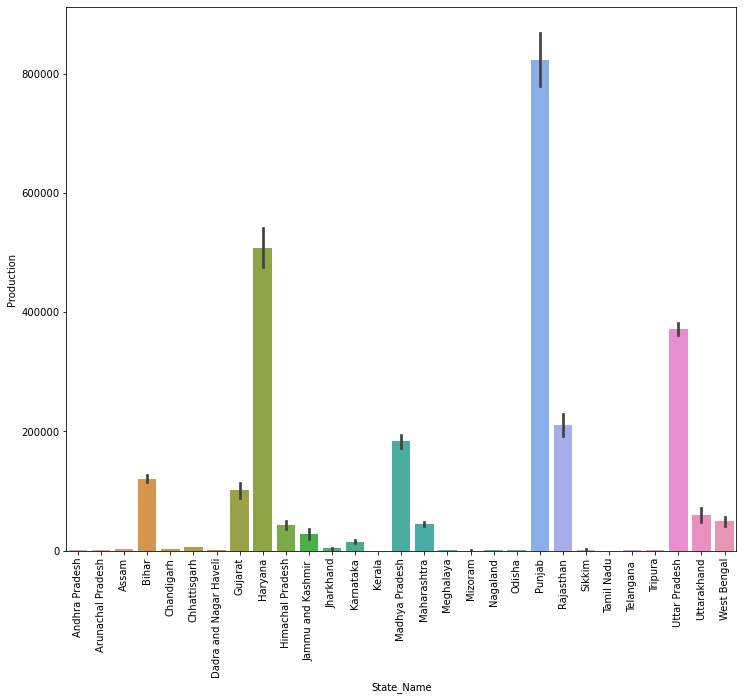

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x='State_Name',y='Production',data=wheat_df)
plt.xticks(rotation=90)
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

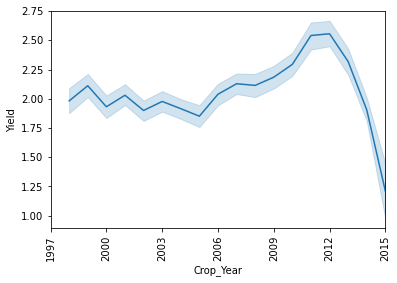

In [ ]:
sns.lineplot("Crop_Year","Yield",data=wheat_df)
plt.xticks(rotation=90)
plt.xticks([1997,2000,2003,2006,2009,2012,2015])
plt.xlim(1997,2015)
plt.plot()

## Observations

1. Wheat is maximum in Rabi Season
2. Punjab is the highest rice producing state.
3. There was a slight increase in wheat yield from 2007 to 2010.

### 4. Potato

In [ ]:
potato_df = df[df['Crop']=='Potato']

In [ ]:
potato_df

State_Name District_Name  Crop_Year       Season    Crop    Area  \
331     Andhra Pradesh     ANANTAPUR       2000  Whole Year   Potato     4.0   
433     Andhra Pradesh     ANANTAPUR       2002  Whole Year   Potato     2.0   
530     Andhra Pradesh     ANANTAPUR       2004  Whole Year   Potato     2.0   
745     Andhra Pradesh     ANANTAPUR       2010  Whole Year   Potato    21.0   
792     Andhra Pradesh     ANANTAPUR       2011  Whole Year   Potato    18.0   
...                ...           ...        ...          ...     ...     ...   
245945     West Bengal       PURULIA       2010  Rabi         Potato   977.0   
245976     West Bengal       PURULIA       2011  Rabi         Potato  1077.0   
246008     West Bengal       PURULIA       2012  Rabi         Potato   913.0   
246043     West Bengal       PURULIA       2013  Rabi         Potato  1726.0   
246080     West Bengal       PURULIA       2014  Rabi         Potato   477.0   

        Production      Yield Crop_5_year  
331           34.0   8.500000   1997-2001  
433           17.0   8.500000   2001-2006  
530           20.0  10.000000   2001-2006  
745          236.0  11.238095   2006-2011  
792          181.0  10.055556   2006-2011  
...            ...        ...         ...  
245945     15920.0  16.294780   2006-2011  
245976     17412.0  16.167131   2006-2011  
246008     17203.0  18.842278   2011-2015  
246043     43703.0  25.320394   2011-2015  
246080      9995.0  20.953878   2011-2015  

[6705 rows x 9 columns]

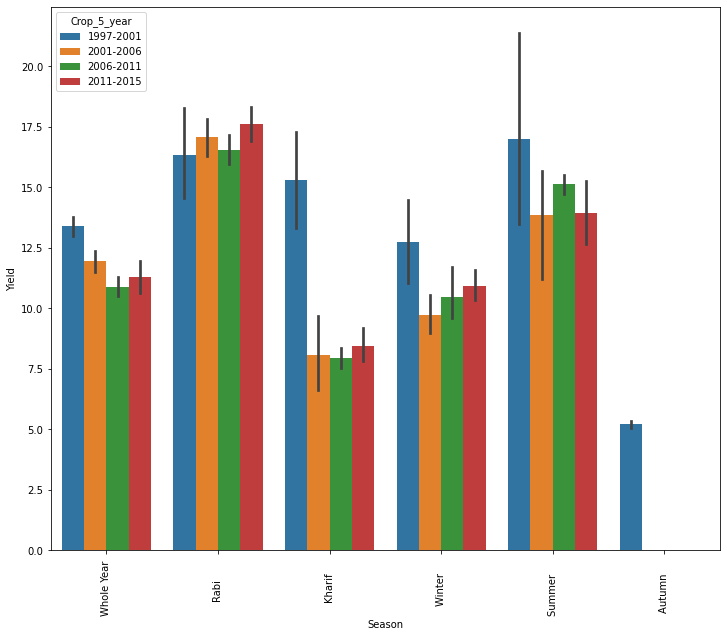

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x='Season',y='Yield',hue='Crop_5_year',data=potato_df)
plt.xticks(rotation=90)
plt.show()

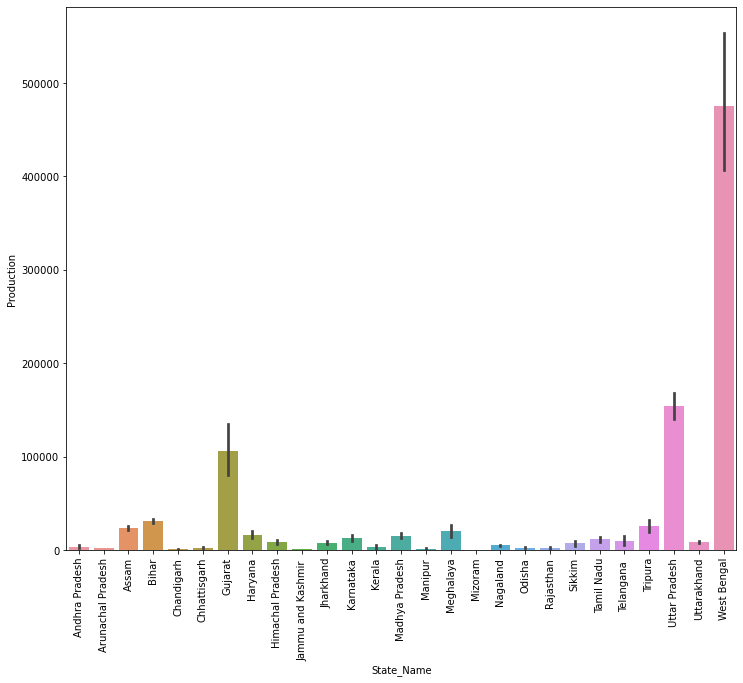

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x='State_Name',y='Production',data=potato_df)
plt.xticks(rotation=90)
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

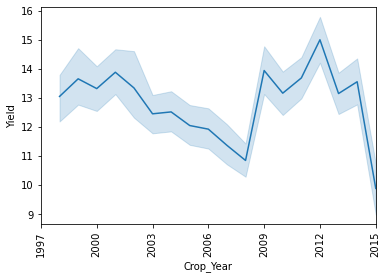

In [ ]:
sns.lineplot("Crop_Year","Yield",data=potato_df)
plt.xticks(rotation=90)
plt.xticks([1997,2000,2003,2006,2009,2012,2015])
plt.xlim(1997,2015)
plt.plot()

## Observations

1. Potato is a Rabi Crop
2. West Bengal is the largest producer of potatoes.
3. There was a sudden increase in wheat yield from 2008 to 2009.

### 5. Onion

In [ ]:
onion_df = df[df['Crop']=='Onion']

In [ ]:
onion_df

State_Name District_Name  Crop_Year       Season   Crop    Area  \
286     Andhra Pradesh     ANANTAPUR       1999  Whole Year   Onion  1770.0   
300     Andhra Pradesh     ANANTAPUR       2000  Kharif       Onion  1103.0   
320     Andhra Pradesh     ANANTAPUR       2000  Rabi         Onion   482.0   
348     Andhra Pradesh     ANANTAPUR       2001  Kharif       Onion  1165.0   
365     Andhra Pradesh     ANANTAPUR       2001  Rabi         Onion   380.0   
...                ...           ...        ...          ...    ...     ...   
236375     Uttarakhand   UTTAR KASHI       2010  Whole Year   Onion    47.0   
236398     Uttarakhand   UTTAR KASHI       2011  Whole Year   Onion     8.0   
236420     Uttarakhand   UTTAR KASHI       2012  Whole Year   Onion    23.0   
236443     Uttarakhand   UTTAR KASHI       2013  Whole Year   Onion    32.0   
236473     Uttarakhand   UTTAR KASHI       2014  Whole Year   Onion    26.0   

        Production      Yield Crop_5_year  
286        32364.0  18.284746   1997-2001  
300        15470.0  14.025385   1997-2001  
320        11514.0  23.887967   1997-2001  
348        19232.0  16.508155   1997-2001  
365         8465.0  22.276316   1997-2001  
...            ...        ...         ...  
236375       306.0   6.510638   2006-2011  
236398        52.0   6.500000   2006-2011  
236420       150.0   6.521739   2011-2015  
236443       212.0   6.625000   2011-2015  
236473       172.0   6.615385   2011-2015  

[6798 rows x 9 columns]

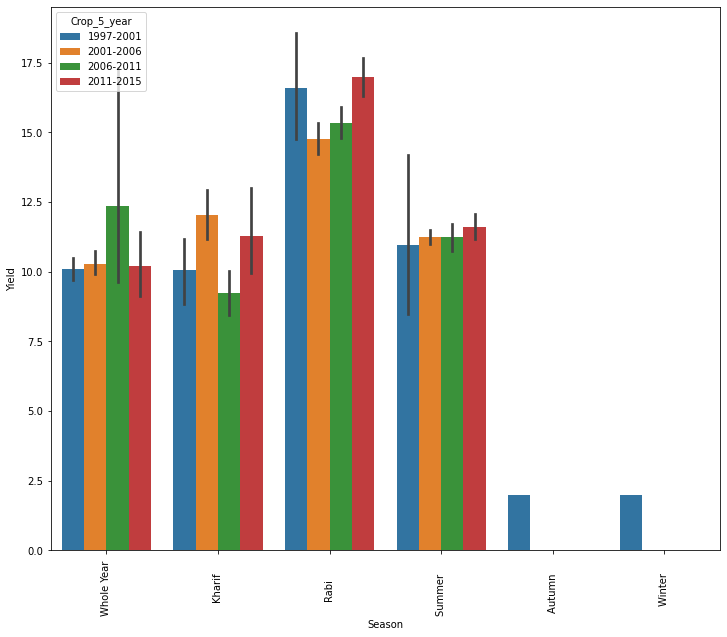

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x='Season',y='Yield',hue='Crop_5_year',data=onion_df)
plt.xticks(rotation=90)
plt.show()

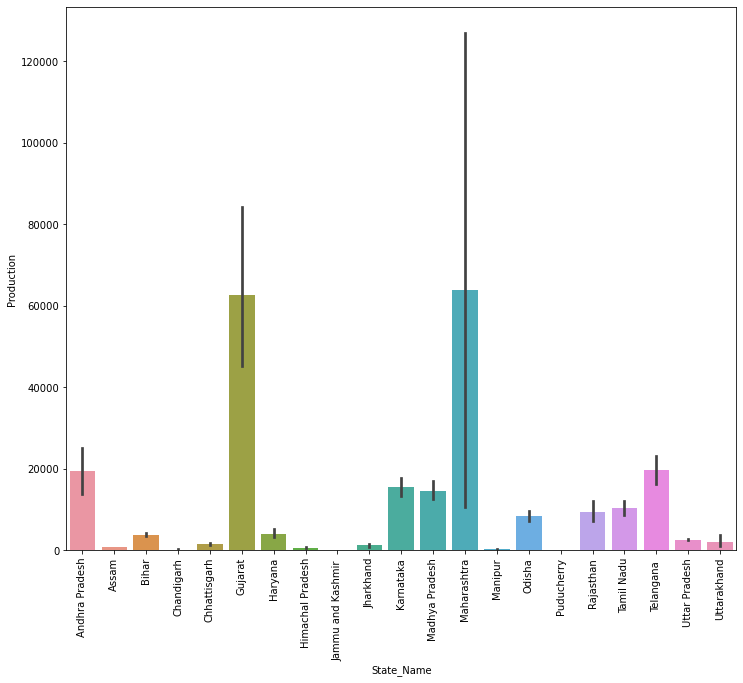

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x='State_Name',y='Production',data=onion_df)
plt.xticks(rotation=90)
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

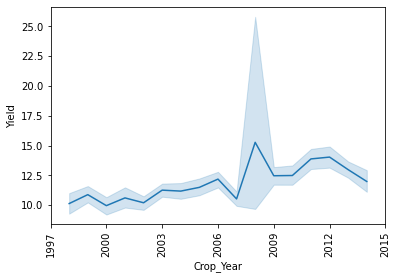

In [ ]:
sns.lineplot("Crop_Year","Yield",data=onion_df)
plt.xticks(rotation=90)
plt.xticks([1997,2000,2003,2006,2009,2012,2015])
plt.xlim(1997,2015)
plt.plot()

## Observations

1. Onion is a rabi crop.
2. Maharastra and Gujarat are the major onion-producing states.
3. There is a sudden increase in Onion yield from 2007 to 2008.

In [ ]:
df.corr()

Crop_Year      Area  Production     Yield
Crop_Year    1.000000 -0.010569    0.005420  0.011509
Area        -0.010569  1.000000    0.054627  0.003244
Production   0.005420  0.054627    1.000000  0.330889
Yield        0.011509  0.003244    0.330889  1.000000

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

#  We have completed que1 as we have done analysis of all datasets

# Que-2

In [ ]:
df

State_Name District_Name  Crop_Year       Season  \
0       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
...                             ...           ...        ...          ...   
246086                  West Bengal       PURULIA       2014  Summer        
246087                  West Bengal       PURULIA       2014  Summer        
246088                  West Bengal       PURULIA       2014  Whole Year    
246089                  West Bengal       PURULIA       2014  Winter        
246090                  West Bengal       PURULIA       2014  Winter        

                       Crop      Area  Production      Yield Crop_5_year  
0                  Arecanut    1254.0      2000.0   1.594896   1997-2001  
1       Other Kharif pulses       2.0         1.0   0.500000   1997-2001  
2                      Rice     102.0       321.0   3.147059   1997-2001  
3                    Banana     176.0       641.0   3.642045   1997-2001  
4                 Cashewnut     720.0       165.0   0.229167   1997-2001  
...                     ...       ...         ...        ...         ...  
246086                 Rice     306.0       801.0   2.617647   2011-2015  
246087              Sesamum     627.0       463.0   0.738437   2011-2015  
246088            Sugarcane     324.0     16250.0  50.154321   2011-2015  
246089                 Rice  279151.0    597899.0   2.141848   2011-2015  
246090              Sesamum     175.0        88.0   0.502857   2011-2015  

[233462 rows x 9 columns]

In [ ]:
df3 = df.drop('District_Name',axis=1)

In [ ]:
df3

State_Name  Crop_Year       Season  \
0       Andaman and Nicobar Islands       2000  Kharif        
1       Andaman and Nicobar Islands       2000  Kharif        
2       Andaman and Nicobar Islands       2000  Kharif        
3       Andaman and Nicobar Islands       2000  Whole Year    
4       Andaman and Nicobar Islands       2000  Whole Year    
...                             ...        ...          ...   
246086                  West Bengal       2014  Summer        
246087                  West Bengal       2014  Summer        
246088                  West Bengal       2014  Whole Year    
246089                  West Bengal       2014  Winter        
246090                  West Bengal       2014  Winter        

                       Crop      Area  Production      Yield Crop_5_year  
0                  Arecanut    1254.0      2000.0   1.594896   1997-2001  
1       Other Kharif pulses       2.0         1.0   0.500000   1997-2001  
2                      Rice     102.0       321.0   3.147059   1997-2001  
3                    Banana     176.0       641.0   3.642045   1997-2001  
4                 Cashewnut     720.0       165.0   0.229167   1997-2001  
...                     ...       ...         ...        ...         ...  
246086                 Rice     306.0       801.0   2.617647   2011-2015  
246087              Sesamum     627.0       463.0   0.738437   2011-2015  
246088            Sugarcane     324.0     16250.0  50.154321   2011-2015  
246089                 Rice  279151.0    597899.0   2.141848   2011-2015  
246090              Sesamum     175.0        88.0   0.502857   2011-2015  

[233462 rows x 8 columns]

In [ ]:
df3.drop('Crop_5_year',axis=True,inplace=True)

In [ ]:
new_df = pd.get_dummies(df3)

In [ ]:
new_df

Crop_Year      Area  Production      Yield  \
0            2000    1254.0      2000.0   1.594896   
1            2000       2.0         1.0   0.500000   
2            2000     102.0       321.0   3.147059   
3            2000     176.0       641.0   3.642045   
4            2000     720.0       165.0   0.229167   
...           ...       ...         ...        ...   
246086       2014     306.0       801.0   2.617647   
246087       2014     627.0       463.0   0.738437   
246088       2014     324.0     16250.0  50.154321   
246089       2014  279151.0    597899.0   2.141848   
246090       2014     175.0        88.0   0.502857   

        State_Name_Andaman and Nicobar Islands  State_Name_Andhra Pradesh  \
0                                            1                          0   
1                                            1                          0   
2                                            1                          0   
3                                            1                          0   
4                                            1                          0   
...                                        ...                        ...   
246086                                       0                          0   
246087                                       0                          0   
246088                                       0                          0   
246089                                       0                          0   
246090                                       0                          0   

        State_Name_Arunachal Pradesh  State_Name_Assam  State_Name_Bihar  \
0                                  0                 0                 0   
1                                  0                 0                 0   
2                                  0                 0                 0   
3                                  0                 0                 0   
4                                  0                 0                 0   
...                              ...               ...               ...   
246086                             0                 0                 0   
246087                             0                 0                 0   
246088                             0                 0                 0   
246089                             0                 0                 0   
246090                             0                 0                 0   

        State_Name_Chandigarh  ...  Crop_Turmeric  Crop_Turnip  Crop_Urad  \
0                           0  ...              0            0          0   
1                           0  ...              0            0          0   
2                           0  ...              0            0          0   
3                           0  ...              0            0          0   
4                           0  ...              0            0          0   
...                       ...  ...            ...          ...        ...   
246086                      0  ...              0            0          0   
246087                      0  ...              0            0          0   
246088                      0  ...              0            0          0   
246089                      0  ...              0            0          0   
246090                      0  ...              0            0          0   

        Crop_Varagu  Crop_Water Melon  Crop_Wheat  Crop_Yam  \
0                 0                 0           0         0   
1                 0                 0           0         0   
2                 0                 0           0         0   
3                 0                 0           0         0   
4                 0                 0           0         0   
...             ...               ...         ...       ...   
246086            0                 0           0         0   
246087            0                 0           0         0   
246088            0          

In [ ]:
print(new_df.columns.tolist())

['Crop_Year', 'Area', 'Production', 'Yield', 'State_Name_Andaman and Nicobar Islands', 'State_Name_Andhra Pradesh', 'State_Name_Arunachal Pradesh', 'State_Name_Assam', 'State_Name_Bihar', 'State_Name_Chandigarh', 'State_Name_Chhattisgarh', 'State_Name_Dadra and Nagar Haveli', 'State_Name_Goa', 'State_Name_Gujarat', 'State_Name_Haryana', 'State_Name_Himachal Pradesh', 'State_Name_Jammu and Kashmir ', 'State_Name_Jharkhand', 'State_Name_Karnataka', 'State_Name_Kerala', 'State_Name_Madhya Pradesh', 'State_Name_Maharashtra', 'State_Name_Manipur', 'State_Name_Meghalaya', 'State_Name_Mizoram', 'State_Name_Nagaland', 'State_Name_Odisha', 'State_Name_Puducherry', 'State_Name_Punjab', 'State_Name_Rajasthan', 'State_Name_Sikkim', 'State_Name_Tamil Nadu', 'State_Name_Telangana ', 'State_Name_Tripura', 'State_Name_Uttar Pradesh', 'State_Name_Uttarakhand', 'State_Name_West Bengal', 'Season_Autumn     ', 'Season_Kharif     ', 'Season_Rabi       ', 'Season_Summer     ', 'Season_Whole Year ', 'Season_

In [ ]:
#new_df.to_csv('que2.csv')

In [ ]:
df = pd.read_csv('que2.csv')

In [ ]:
df

Unnamed: 0  Crop_Year     Area  Production     Yield  \
0               0       2000   1254.0      2000.0  1.594896   
1               1       2000      2.0         1.0  0.500000   
2               2       2000    102.0       321.0  3.147059   
3               3       2000    176.0       641.0  3.642045   
4               4       2000    720.0       165.0  0.229167   
...           ...        ...      ...         ...       ...   
74832       79522       2001     17.0        88.0  5.176471   
74833       79523       2002   7906.0      2704.0  0.342019   
74834       79524       2002  13560.0      6488.0  0.478466   
74835       79525       2002    326.0       301.0  0.923313   
74836       79526       2002  35188.0     38941.0  1.106656   

       State_Name_Andaman and Nicobar Islands  State_Name_Andhra Pradesh  \
0                                           1                          0   
1                                           1                          0   
2                                           1                          0   
3                                           1                          0   
4                                           1                          0   
...                                       ...                        ...   
74832                                       0                          0   
74833                                       0                          0   
74834                                       0                          0   
74835                                       0                          0   
74836                                       0                          0   

       State_Name_Arunachal Pradesh  State_Name_Assam  State_Name_Bihar  ...  \
0                                 0                 0                 0  ...   
1                                 0                 0                 0  ...   
2                                 0                 0                 0  ...   
3                                 0                 0                 0  ...   
4                                 0                 0                 0  ...   
...                             ...               ...               ...  ...   
74832                             0                 0                 0  ...   
74833                             0                 0                 0  ...   
74834                             0                 0                 0  ...   
74835                             0                 0                 0  ...   
74836                             0                 0                 0  ...   

       Crop_Turmeric  Crop_Turnip  Crop_Urad  Crop_Varagu  Crop_Water Melon  \
0                  0            0          0            0                 0   
1                  0            0          0            0                 0   
2                  0            0          0            0                 0   
3                  0            0          0            0                 0   
4                  0            0          0            0                 0   
...              ...          ...        ...          ...               ...   
74832              1            0          0            0                 0   
74833              0            0          0            0                 0   
74834              0            0          0            0                 0   
74835              0            0          0            0                 0   
74836              0            0          0            0                 0   

       Crop_Wheat  Crop_Yam  Crop_other fibres  Crop_other misc. pulses  \
0               0         0                  0                        0   
1               0         0                  0                        0   
2               0         0                  0                        0   
3               0         0                  0                        0   
4               0         0                  0      

In [ ]:
df = df.drop('Unnamed: 0',axis=1)

In [ ]:
df.head()

Crop_Year    Area  Production     Yield  \
0       2000  1254.0      2000.0  1.594896   
1       2000     2.0         1.0  0.500000   
2       2000   102.0       321.0  3.147059   
3       2000   176.0       641.0  3.642045   
4       2000   720.0       165.0  0.229167   

   State_Name_Andaman and Nicobar Islands  State_Name_Andhra Pradesh  \
0                                       1                          0   
1                                       1                          0   
2                                       1                          0   
3                                       1                          0   
4                                       1                          0   

   State_Name_Arunachal Pradesh  State_Name_Assam  State_Name_Bihar  \
0                             0                 0                 0   
1                             0                 0                 0   
2                             0                 0                 0   
3                             0                 0                 0   
4                             0                 0                 0   

   State_Name_Chandigarh  ...  Crop_Turmeric  Crop_Turnip  Crop_Urad  \
0                      0  ...              0            0          0   
1                      0  ...              0            0          0   
2                      0  ...              0            0          0   
3                      0  ...              0            0          0   
4                      0  ...              0            0          0   

   Crop_Varagu  Crop_Water Melon  Crop_Wheat  Crop_Yam  Crop_other fibres  \
0            0                 0           0         0                  0   
1            0                 0           0         0                  0   
2            0                 0           0         0                  0   
3            0                 0           0         0                  0   
4            0                 0           0         0                  0   

   Crop_other misc. pulses  Crop_other oilseeds  
0                        0                    0  
1                        0                    0  
2                        0                    0  
3                        0                    0  
4                        0                    0  

[5 rows x 167 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
X = df.drop(['Production','Yield'],axis=1)
y = df['Production']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [ ]:
print(f'X_train Size: ' ,X_train.shape)
print('X_test Size: ' ,X_test.shape)
print('y_train Size: ' ,y_train.shape)
print('y_test Size: ' ,y_test.shape)

X_train Size:  (67353, 165)
X_test Size:  (7484, 165)
y_train Size:  (67353,)
y_test Size:  (7484,)


### Linear Regression

In [ ]:
linear_model = LinearRegression()

In [ ]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = linear_model.predict(X_test)

In [ ]:
y_pred

array([-43672.77109963, 543539.86089621,  50351.98013473, ...,
       123933.06021475,  15112.18264914, 258812.02168625])

In [ ]:
linear_model.score(X_test,y_test)

0.04535876899967706

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_pred)

0.04535876899967706

In [ ]:
mean_absolute_error(y_test,y_pred)

778398.0812936788

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

8310428.728301428

In [ ]:
# Lets standarize our data
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
sc.fit(X_train)

StandardScaler()

In [ ]:
X_train = sc.transform(X_train)

In [ ]:
X_test = sc.transform(X_test)

In [ ]:
# remember to fit only training dataset and transform both training and testing datasets

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([-38703.06680133, 567504.93319867,  14544.93319867, ...,
       178384.93319867,  24784.93319867, 262352.93319867])

In [ ]:
model.score(X_test,y_test)

0.04521699311217697

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
random_model = RandomForestRegressor(n_estimators=10)

In [ ]:
random_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10)

In [ ]:
rf_pred = random_model.predict(X_test)

In [ ]:
random_model.score(X_test,y_test)

0.9903072716483162

In [ ]:
y_test

43950        37.0
49010    138630.0
21630     62820.0
71594      5603.0
33197        22.0
           ...   
37434     14151.0
69140       172.0
68945      5185.0
29728      2638.0
56198      3800.0
Name: Production, Length: 7484, dtype: float64

In [ ]:
y_pred

array([-38703.06680133, 567504.93319867,  14544.93319867, ...,
       178384.93319867,  24784.93319867, 262352.93319867])

### Decision Tree Classifier

In [ ]:
# Decison Tree Regressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 5)
regressor.fit(X_train,y_train)

# Predicting results
decisiontree_predict = regressor.predict(X_test)
decisiontree_predict

array([5.6000e+01, 1.9352e+05, 6.2820e+04, ..., 4.3090e+03, 2.1520e+03,
       4.0000e+03])

In [ ]:
regressor.score(X_test,y_test)*100


99.2654569217058

In [ ]:
decisiontree_predict

array([5.6000e+01, 1.9352e+05, 6.2820e+04, ..., 4.3090e+03, 2.1520e+03,
       4.0000e+03])

In [ ]:
y_test

43950        37.0
49010    138630.0
21630     62820.0
71594      5603.0
33197        22.0
           ...   
37434     14151.0
69140       172.0
68945      5185.0
29728      2638.0
56198      3800.0
Name: Production, Length: 7484, dtype: float64

As we can see, the Decision Tree Classifier suits the best model for this question.

# Que3.

In [ ]:
df35=pd.read_csv(r'C:\Users\lenovo\Downloads\crop_production.csv')

In [ ]:
df35.drop_duplicates(inplace=True,keep="first")
df35.shape

(246091, 7)

In [ ]:
df35.dropna(inplace=True)
print(df35.columns)
print(df35.shape)

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')
(242361, 7)


In [ ]:
xlog=df35[['District_Name','Crop','Production']]
xlog.head()

District_Name                 Crop  Production
0      NICOBARS             Arecanut      2000.0
1      NICOBARS  Other Kharif pulses         1.0
2      NICOBARS                 Rice       321.0
3      NICOBARS               Banana       641.0
4      NICOBARS            Cashewnut       165.0

In [ ]:
xlog = pd.concat([xlog, pd.get_dummies(xlog['Crop'])], axis=1)
xlog = pd.concat([xlog, pd.get_dummies(xlog['District_Name'])], axis=1)
xlog.head()

District_Name                 Crop  Production  Apple  Arcanut (Processed)  \
0      NICOBARS             Arecanut      2000.0      0                    0   
1      NICOBARS  Other Kharif pulses         1.0      0                    0   
2      NICOBARS                 Rice       321.0      0                    0   
3      NICOBARS               Banana       641.0      0                    0   
4      NICOBARS            Cashewnut       165.0      0                    0   

   Arecanut  Arhar/Tur  Ash Gourd  Atcanut (Raw)  Bajra  ...  \
0         1          0          0              0      0  ...   
1         0          0          0              0      0  ...   
2         0          0          0              0      0  ...   
3         0          0          0              0      0  ...   
4         0          0          0              0      0  ...   

   WEST KHASI HILLS  WEST SIANG  WEST SINGHBHUM  WEST TRIPURA  WOKHA  YADGIR  \
0                 0           0               0             0      0       0   
1                 0           0               0             0      0       0   
2                 0           0               0             0      0       0   
3                 0           0               0             0      0       0   
4                 0           0               0             0      0       0   

   YAMUNANAGAR  YANAM  YAVATMAL  ZUNHEBOTO  
0            0      0         0          0  
1            0      0         0          0  
2            0      0         0          0  
3            0      0         0          0  
4            0      0         0          0  

[5 rows x 773 columns]

In [ ]:
dis=input("Enter district name: ")
xlog1=xlog.loc[(xlog['District_Name']==dis)]
max_pro=xlog1['Production'].max()
print(max_pro)

Enter district name: NICOBARS
71300000.0


In [ ]:
print("The crop you can grow is: ")
df99=xlog.loc[(xlog['Production']==max_pro)]
print(df99['Crop'])

The crop you can grow is: 
77    Coconut 
Name: Crop, dtype: object


#  Que4 and Que 5.

In [ ]:
df=pd.read_csv(r'C:\Users\lenovo\Downloads\crop_production.csv')

In [ ]:
df.head()

State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0

In [ ]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [ ]:
df['Yield']=df['Production']/df['Area']
df.head()

State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production     Yield  
0             Arecanut  1254.0      2000.0  1.594896  
1  Other Kharif pulses     2.0         1.0  0.500000  
2                 Rice   102.0       321.0  3.147059  
3               Banana   176.0       641.0  3.642045  
4            Cashewnut   720.0       165.0  0.229167

### creating dummy columns

In [ ]:
df = pd.concat([df, pd.get_dummies(df['Crop'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['District_Name'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['Season'])], axis=1)
df.head()

State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production     Yield  Apple  \
0             Arecanut  1254.0      2000.0  1.594896      0   
1  Other Kharif pulses     2.0         1.0  0.500000      0   
2                 Rice   102.0       321.0  3.147059      0   
3               Banana   176.0       641.0  3.642045      0   
4            Cashewnut   720.0       165.0  0.229167      0   

   Arcanut (Processed)  ...  YAMUNANAGAR  YANAM  YAVATMAL  ZUNHEBOTO  \
0                    0  ...            0      0         0          0   
1                    0  ...            0      0         0          0   
2                    0  ...            0      0         0          0   
3                    0  ...            0      0         0          0   
4                    0  ...            0      0         0          0   

   Autumn       Kharif       Rabi         Summer       Whole Year   \
0            0            1            0            0            0   
1            0            1            0            0            0   
2            0            1            0            0            0   
3            0            0            0            0            1   
4            0            0            0            0            1   

   Winter       
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 784 columns]

In [ ]:
df1=df.drop(['Crop','State_Name','District_Name','Season'],axis=1)
df1.shape

(246091, 780)

In [ ]:
df1.columns

Index(['Crop_Year', 'Area', 'Production', 'Yield', 'Apple',
       'Arcanut (Processed)', 'Arecanut', 'Arhar/Tur', 'Ash Gourd',
       'Atcanut (Raw)',
       ...
       'YAMUNANAGAR', 'YANAM', 'YAVATMAL', 'ZUNHEBOTO', 'Autumn     ',
       'Kharif     ', 'Rabi       ', 'Summer     ', 'Whole Year ',
       'Winter     '],
      dtype='object', length=780)

In [ ]:
df1.isnull().sum()

Crop_Year         0
Area              0
Production     3730
Yield          3730
Apple             0
               ... 
Kharif            0
Rabi              0
Summer            0
Whole Year        0
Winter            0
Length: 780, dtype: int64

### there are 3730 null values we have to drop them

In [ ]:
df1.dropna(axis=0,inplace=True)
df1.shape

(242361, 780)

In [ ]:
x=df1.drop('Yield',axis=1)
x.shape

(242361, 779)

In [ ]:
y=df1['Yield']
y.head()

0    1.594896
1    0.500000
2    3.147059
3    3.642045
4    0.229167
Name: Yield, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg1=RandomForestRegressor(n_estimators=10)

In [ ]:
reg1.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10)

In [ ]:
y_pre=reg1.predict(x_test)
y_pre

array([0.52245055, 1.78951472, 0.84724079, ..., 0.5       , 3.56505398,
       1.14834201])

In [ ]:
reg1.score(x_test,y_test)

0.4826166333424625

In [ ]:
# Decison Tree Regressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 5)
regressor.fit(x_train,y_train)

# Predicting results
decisiontree_predict = regressor.predict(x_test)
#checking score
print(regressor.score(x_test,y_test))

0.4962691814668252


Accuracy score approax same, so we can use any one

In [ ]:
x_train.iloc[30]

Crop_Year               2010.0
Area                   10234.0
Production              4182.0
Apple                      0.0
Arcanut (Processed)        0.0
                        ...   
Kharif                     0.0
Rabi                       1.0
Summer                     0.0
Whole Year                 0.0
Winter                     0.0
Name: 168012, Length: 779, dtype: float64

In [ ]:
y_train.iloc[30]

0.40863787375415284

In [ ]:
reg1.predict([x_train.iloc[30]])

C:\Users\lenovo\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.40947685])

### This predicted yield is approaximately same as the actual yield for that provided data

# Prediction of crop

In [ ]:
dfc1=pd.read_csv(r'C:\Users\lenovo\Downloads\cpdata.csv')

In [ ]:
print(dfc1.shape)

(3100, 5)


In [ ]:
dfc1.head()

temperature   humidity        ph    rainfall label
0    20.879744  82.002744  6.502985  202.935536  rice
1    21.770462  80.319644  7.038096  226.655537  rice
2    23.004459  82.320763  7.840207  263.964248  rice
3    26.491096  80.158363  6.980401  242.864034  rice
4    20.130175  81.604873  7.628473  262.717340  rice

In [ ]:
dfc1.drop_duplicates(inplace=True,keep="first")
dfc1.shape

(3100, 5)

In [ ]:
X=dfc1[['temperature','humidity','ph','rainfall']]
Y=dfc1['label']

In [ ]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()

In [ ]:
lreg.fit(X,Y)

C:\Users\lenovo\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
X.iloc[1001]

temperature    33.844046
humidity       61.362111
ph              6.331147
rainfall       92.652129
Name: 1001, dtype: float64

In [ ]:
Y.iloc[1001]

'Ground Nut'

In [ ]:
lreg.predict([X.iloc[1001]])

C:\Users\lenovo\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Ground Nut'], dtype=object)

In [ ]:
df_msp=pd.read_csv(r'C:\Users\lenovo\Downloads\Book1.csv')

In [ ]:
df1=pd.read_csv(r'C:\Users\lenovo\Downloads\state_wise_crop_production.csv')

In [ ]:
df1.columns

Index(['Crop', 'State', 'Cost of Cultivation (`/Hectare) A2+FL',
       'Cost of Cultivation (`/Hectare) C2',
       'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) '],
      dtype='object')

In [ ]:
df1.shape

(49, 6)

In [ ]:
dfmrgd=pd.merge(df_msp,df1,on='Crop')

In [ ]:
dfmrgd.head()

Crop   MSP           State  Cost of Cultivation (`/Hectare) A2+FL  \
0  PADDY  1940   Uttar Pradesh                               17022.00   
1  PADDY  1940          Orissa                               17478.05   
2  PADDY  1940     West Bengal                               24731.06   
3  PADDY  1940          Punjab                               25154.75   
4  PADDY  1940  Andhra Pradesh                               29664.84   

   Cost of Cultivation (`/Hectare) C2  Cost of Production (`/Quintal) C2  \
0                            28144.50                             732.62   
1                            25909.05                             715.04   
2                            33046.12                             731.25   
3                            45291.24                             669.86   
4                            46450.20                             789.90   

   Yield (Quintal/ Hectare)   
0                      36.61  
1                      32.42  
2                      39.04  
3                      67.41  
4                      56.00

In [ ]:
dfmrgd.shape

(49, 7)

In [ ]:
dfmrgd.columns

Index(['Crop', 'MSP', 'State', 'Cost of Cultivation (`/Hectare) A2+FL',
       'Cost of Cultivation (`/Hectare) C2',
       'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) '],
      dtype='object')

In [ ]:
dfmrgd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Crop                                   49 non-null     object 
 1   MSP                                    49 non-null     object 
 2   State                                  49 non-null     object 
 3   Cost of Cultivation (`/Hectare) A2+FL  49 non-null     float64
 4   Cost of Cultivation (`/Hectare) C2     49 non-null     float64
 5   Cost of Production (`/Quintal) C2      49 non-null     float64
 6   Yield (Quintal/ Hectare)               49 non-null     float64
dtypes: float64(4), object(3)
memory usage: 3.1+ KB


In [ ]:
dfmrgd['MSP']=pd.to_numeric(dfmrgd['MSP'])
dfmrgd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Crop                                   49 non-null     object 
 1   MSP                                    49 non-null     int64  
 2   State                                  49 non-null     object 
 3   Cost of Cultivation (`/Hectare) A2+FL  49 non-null     float64
 4   Cost of Cultivation (`/Hectare) C2     49 non-null     float64
 5   Cost of Production (`/Quintal) C2      49 non-null     float64
 6   Yield (Quintal/ Hectare)               49 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.1+ KB


In [ ]:
ndf1=pd.DataFrame({'Mul':dfmrgd['MSP']*dfmrgd['Yield (Quintal/ Hectare) ']})
print(ndf1)

          Mul
0    71023.40
1    62894.80
2    75737.60
3   130775.40
4   108640.00
5    80316.50
6    58157.00
7    44057.20
8    25619.00
9    79811.60
10   61929.00
11   47061.00
12   60417.00
13   40446.00
14   54936.00
15   21897.75
16   29463.75
17    9603.00
18   42922.50
19   48742.50
20   72662.94
21  139657.14
22  102094.58
23  109080.30
24  113947.40
25   26140.50
26   66433.50
27   66489.00
28   74647.50
29   51781.50
30   47533.85
31   80257.45
32   70504.85
33   74937.85
34   35720.90
35   53816.70
36   57163.90
37   42101.50
38   87288.70
39   65347.00
40   68377.00
41   68528.50
42   58630.50
43  100697.00
44  136911.45
45  300794.05
46  231165.60
47  226923.05
48  309712.25


## Case1
#### if farmer having his own land

In [ ]:
ndf2=pd.DataFrame({'profit(without rent)':(ndf1['Mul'])-(dfmrgd['Cost of Cultivation (`/Hectare) A2+FL'])-((dfmrgd['Cost of Production (`/Quintal) C2'])*(dfmrgd['Yield (Quintal/ Hectare) ']))})
print(ndf2)

    profit(without rent)
0             27180.1818
1             22235.1532
2             22458.5400
3             60465.3874
4             34740.7600
5             49432.3115
6             26273.5910
7             14115.1188
8             -9023.2620
9             18248.5556
10            33049.5135
11            20239.5738
12            28743.4830
13             -170.5268
14            13600.4740
15             8545.6486
16            14881.4065
17            -4463.9136
18            23087.3970
19            22811.4320
20            16725.6257
21            61738.3336
22            28200.6883
23            37949.3070
24            41694.1650
25            -3916.2871
26            14622.2173
27            15732.3000
28            25886.7460
29            -4221.7355
30            15955.6525
31            30256.6860
32            24588.7684
33            30396.4298
34            15614.1722
35            28043.3474
36            23753.1676
37            10780.2260
38            46846.3424


## Case2
#### if farmer doesn't having his own land

In [ ]:
ndf3=pd.DataFrame({'profit(with rent)':ndf1['Mul']-dfmrgd['Cost of Cultivation (`/Hectare) C2']-((dfmrgd['Cost of Production (`/Quintal) C2'])*(dfmrgd['Yield (Quintal/ Hectare) ']))})
print(ndf3)

    profit(with rent)
0          16057.6818
1          13804.1532
2          14143.4800
3          40328.8974
4          17955.4000
5          43088.5315
6          19394.9010
7           8726.2888
8         -14432.9420
9           6133.7956
10         19766.8235
11         14304.0438
12         22660.4030
13         -7290.5168
14          5460.7640
15          5762.2086
16         11920.0465
17         -5891.9136
18         16562.2570
19         18220.7420
20          7320.2457
21         39956.6036
22         12584.7383
23         25494.9570
24         27594.9550
25         -7583.3871
26          5416.6173
27          7846.5000
28         18723.5760
29        -10826.5355
30          5930.3025
31         12778.7860
32         11665.4084
33         19639.1498
34         11556.0122
35         20974.0674
36         14967.7776
37          5086.8460
38         34506.2324
39         31083.0460
40         30956.0934
41         24316.4508
42         20850.2060
43         48242.1272
44        

In [ ]:
dfmrgd['Profit(without rent)']=ndf2
dfmrgd['Profit(with rent)']=ndf3
dfmrgd

Crop   MSP           State  \
0                  PADDY  1940   Uttar Pradesh   
1                  PADDY  1940          Orissa   
2                  PADDY  1940     West Bengal   
3                  PADDY  1940          Punjab   
4                  PADDY  1940  Andhra Pradesh   
5                  MAIZE  1870           Bihar   
6                  MAIZE  1870       Karnataka   
7                  MAIZE  1870       Rajasthan   
8                  MAIZE  1870   Uttar Pradesh   
9                  MAIZE  1870  Andhra Pradesh   
10                 ARHAR  6300   Uttar Pradesh   
11                 ARHAR  6300       Karnataka   
12                 ARHAR  6300         Gujarat   
13                 ARHAR  6300  Andhra Pradesh   
14                 ARHAR  6300     Maharashtra   
15                 MOONG  7275          Orissa   
16                 MOONG  7275       Rajasthan   
17                 MOONG  7275       Karnataka   
18                 MOONG  7275  Andhra Pradesh   
19                 MOONG  7275     Maharashtra   
20                COTTON  5726     Maharashtra   
21                COTTON  5726          Punjab   
22                COTTON  5726  Andhra Pradesh   
23                COTTON  5726         Gujarat   
24                COTTON  5726         Haryana   
25             GROUNDNUT  5550       Karnataka   
26             GROUNDNUT  5550  Andhra Pradesh   
27             GROUNDNUT  5550      Tamil Nadu   
28             GROUNDNUT  5550         Gujarat   
29             GROUNDNUT  5550     Maharashtra   
30                 WHEAT  2015  Madhya Pradesh   
31                 WHEAT  2015          Punjab   
32                 WHEAT  2015   Uttar Pradesh   
33                 WHEAT  2015       Rajasthan   
34                  GRAM  5230       Rajasthan   
35                  GRAM  5230  Madhya Pradesh   
36                  GRAM  5230   Uttar Pradesh   
37                  GRAM  5230     Maharashtra   
38                  GRAM  5230  Andhra Pradesh   
39  RAPESEED AND MUSTARD  5050  Madhya Pradesh   
40  RAPESEED AND MUSTARD  5050       Rajasthan   
41  RAPESEED AND MUSTARD  5050   Uttar Pradesh   
42  RAPESEED AND MUSTARD  5050         Gujarat   
43  RAPESEED AND MUSTARD  5050         Haryana   
44             SUGARCANE   305   Uttar Pradesh   
45             SUGARCANE   305       Karnataka   
46             SUGARCANE   305  Andhra Pradesh   
47             SUGARCANE   305     Maharashtra   
48             SUGARCANE   305      Tamil Nadu   

    Cost of Cultivation (`/Hectare) A2+FL  Cost of Cultivation (`/Hectare) C2  \
0                                17022.00                            28144.50   
1                                17478.05                            25909.05   
2                                24731.06                            33046.12   
3                                25154.75                            45291.24   
4                                29664.84                            46450.20   
5                                13513.92                            19857.70   
6                                13792.85                            20671.54   
7                                14421.46                            19810.29   
8                                15635.43                            21045.11   
9                                25687.09                            37801.85   
10                                9794.05                            23076.74   
11                               10593.15                            16528.68   
12                               13468.82                            19551.90   
13                               17051.66                            24171.65   
14                               17130.55                            25270.26   
15                                5483.54                             8266.98   
16                                6204.23                             9165.59   
17                                6440.64                    

In [ ]:
dfmrgd=pd.concat([dfmrgd,pd.get_dummies(dfmrgd['Crop'])],axis=1)
dfmrgd=pd.concat([dfmrgd,pd.get_dummies(dfmrgd['State'])],axis=1)
dfmrgd.head()

Crop   MSP           State  Cost of Cultivation (`/Hectare) A2+FL  \
0  PADDY  1940   Uttar Pradesh                               17022.00   
1  PADDY  1940          Orissa                               17478.05   
2  PADDY  1940     West Bengal                               24731.06   
3  PADDY  1940          Punjab                               25154.75   
4  PADDY  1940  Andhra Pradesh                               29664.84   

   Cost of Cultivation (`/Hectare) C2  Cost of Production (`/Quintal) C2  \
0                            28144.50                             732.62   
1                            25909.05                             715.04   
2                            33046.12                             731.25   
3                            45291.24                             669.86   
4                            46450.20                             789.90   

   Yield (Quintal/ Hectare)   Profit(without rent)  Profit(with rent)  ARHAR  \
0                      36.61            27180.1818         16057.6818      0   
1                      32.42            22235.1532         13804.1532      0   
2                      39.04            22458.5400         14143.4800      0   
3                      67.41            60465.3874         40328.8974      0   
4                      56.00            34740.7600         17955.4000      0   

   ...  Haryana  Karnataka  Madhya Pradesh  Maharashtra  Orissa  Punjab  \
0  ...        0          0               0            0       0       0   
1  ...        0          0               0            0       1       0   
2  ...        0          0               0            0       0       0   
3  ...        0          0               0            0       0       1   
4  ...        0          0               0            0       0       0   

   Rajasthan  Tamil Nadu  Uttar Pradesh  West Bengal  
0          0           0              1            0  
1          0           0              0            0  
2          0           0              0            1  
3          0           0              0            0  
4          0           0              0            0  

[5 rows x 32 columns]

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [ ]:
x=dfmrgd.drop(['Crop','State','Profit(without rent)','Profit(with rent)'],axis=1)
print(x.head())
y=dfmrgd[['Profit(without rent)','Profit(with rent)']]
print(y.head())

    MSP  Cost of Cultivation (`/Hectare) A2+FL  \
0  1940                               17022.00   
1  1940                               17478.05   
2  1940                               24731.06   
3  1940                               25154.75   
4  1940                               29664.84   

   Cost of Cultivation (`/Hectare) C2  Cost of Production (`/Quintal) C2  \
0                            28144.50                             732.62   
1                            25909.05                             715.04   
2                            33046.12                             731.25   
3                            45291.24                             669.86   
4                            46450.20                             789.90   

   Yield (Quintal/ Hectare)   ARHAR  COTTON  GRAM  GROUNDNUT  MAIZE  ...  \
0                      36.61      0       0     0          0      0  ...   
1                      32.42      0       0     0          0      0  ...   
2             

In [ ]:
reg.fit(x,y)

LinearRegression()

In [ ]:
x.iloc[10]

MSP                                       6300.00
Cost of Cultivation (`/Hectare) A2+FL     9794.05
Cost of Cultivation (`/Hectare) C2       23076.74
Cost of Production (`/Quintal) C2         1941.55
Yield (Quintal/ Hectare)                     9.83
ARHAR                                        1.00
COTTON                                       0.00
GRAM                                         0.00
GROUNDNUT                                    0.00
MAIZE                                        0.00
MOONG                                        0.00
PADDY                                        0.00
RAPESEED AND MUSTARD                         0.00
SUGARCANE                                    0.00
WHEAT                                        0.00
Andhra Pradesh                               0.00
Bihar                                        0.00
Gujarat                                      0.00
Haryana                                      0.00
Karnataka                                    0.00


In [ ]:
y.iloc[10]

Profit(without rent)    33049.5135
Profit(with rent)       19766.8235
Name: 10, dtype: float64

In [ ]:
reg.predict([x.iloc[10]])

C:\Users\lenovo\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[32240.65625, 18958.25   ]])

## This predicted profit is approaximately equal to actual profit

In [ ]:
newdf=dfmrgd
newdf.head()
newdf.shape

(49, 32)

In [ ]:
newdf.columns

Index(['Crop', 'MSP', 'State', 'Cost of Cultivation (`/Hectare) A2+FL',
       'Cost of Cultivation (`/Hectare) C2',
       'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) ',
       'Profit(without rent)', 'Profit(with rent)', 'ARHAR', 'COTTON', 'GRAM',
       'GROUNDNUT', 'MAIZE', 'MOONG', 'PADDY', 'RAPESEED AND MUSTARD',
       'SUGARCANE', 'WHEAT', 'Andhra Pradesh', 'Bihar', 'Gujarat', 'Haryana',
       'Karnataka', 'Madhya Pradesh', 'Maharashtra', 'Orissa', 'Punjab',
       'Rajasthan', 'Tamil Nadu', 'Uttar Pradesh', 'West Bengal'],
      dtype='object')

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = newdf.drop(['Crop','State','Yield (Quintal/ Hectare) '],axis=1)
y = newdf['Yield (Quintal/ Hectare) ']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [ ]:
print('X_train Size: ' ,X_train.shape)
print('X_test Size: ' ,X_test.shape)
print('y_train Size: ' ,y_train.shape)
print('y_test Size: ' ,y_test.shape)

X_train Size:  (44, 29)
X_test Size:  (5, 29)
y_train Size:  (44,)
y_test Size:  (5,)


# Q7. If the information about soil health is available, then suggest the prescriptive actions for the soil improvement if any, and the cost associated with the change.
    you can see below the datset so that you can get idea about the information of soil health which was given

In [ ]:
df33=pd.read_csv(r'C:\Users\lenovo\Downloads\cropph.csv')

In [ ]:
df33

Crop    Ph
0                   Bajra  3.00
1                  Banana  6.50
2                  Barley  3.00
3                    Bean  5.50
4            Black pepper  6.40
5               Blackgram  5.00
6            Bottle Gourd  6.50
7                 Brinjal  5.50
8                 Cabbage  5.50
9                Cardamom  4.50
10                 Carrot  5.50
11            Castor seed  5.00
12            Cauliflower  6.00
13               Chillies  5.50
14              Colocosia  5.50
15              Coriander  8.00
16                 Cotton  7.00
17                 Cowpea  6.00
18             Drum Stick  6.40
19                 Garlic  6.10
20                 Ginger  5.00
21                   Gram  6.10
22                 Grapes  6.50
23              Groundnut  5.00
24              Guar seed  5.00
25             Horse-gram  5.00
26                  Jowar  6.00
27                   Jute  7.40
28                Khesari  7.80
29            Lady Finger  6.10
30                 Lentil  7.00
31                Linseed  5.00
32                  Maize  5.50
33                  Mesta  4.50
34      Moong(Green Gram)  6.30
35                   Moth  4.01
36                  Onion  7.30
37                 Orange  6.00
38                 Papaya  6.90
39  Peas & beans (Pulses)  6.10
40              Pineapple  5.80
41                 Potato  6.30
42                Raddish  7.30
43                   Ragi  5.10
44                   Rice  5.00
45              Safflower  5.00
46               Sannhamp  5.80
47                Sesamum  5.50
48               Soyabean  6.90
49              Sugarcane  5.00
50              Sunflower  6.10
51           Sweet potato  5.60
52                Tapioca  5.10
53                 Tomato  5.00
54               Turmeric  4.50
55                   Urad  6.80
56                 Varagu  5.50
57                  Wheat  5.00

In [ ]:
df33.shape

(58, 2)

In [ ]:
ph=int(input("Enter the ph of soil "))
crop=input("enter the name of crop")
new_df=df33[df33['Crop']==crop]
print("Required ph of soil is ",new_df[' Ph'])

Enter the ph of soil 4
enter the name of cropBajra
Required ph of soil is  0    3.0
Name:  Ph, dtype: float64


In [ ]:
if((ph==new_df[' Ph']).bool()):
    print("ph of your soil is perfect for desired crop")
elif((ph<new_df[' Ph']).bool()):
    print(" soil is acidic compared to desired ph ")
    print("You can use limestone, hydrated lime, or wood ash to make your soil more alkaline.")
elif((ph>new_df[' Ph']).bool()):
    print("soil is alkaline in nature compared to desired Ph\n")
    
    print("One of the easiest ways to make soil more acidic is to add sphagnum peat to the topsoil in and around plants \n. For another quick fix, water plants several times with a solution of 2 tablespoons vinegar to a gallon of water. This is a great way to adjust pH in container plants. Acidifying fertilizers can also be used to help raise acidity levels.\n")
    
    print("In some instances, applying elemental sulfur (flowers of sulfur) is effective. However, sulfur is slow acting, taking several months. This is also most often used by large-scale growers rather than the home gardener. Granular sulfur is deemed safe and cost effective for smaller garden areas, with applications of no more than 2 pounds (.9 kg.) per 100 square feet (9. square meters).")


soil is alkaline in nature compared to desired Ph

One of the easiest ways to make soil more acidic is to add sphagnum peat to the topsoil in and around plants 
. For another quick fix, water plants several times with a solution of 2 tablespoons vinegar to a gallon of water. This is a great way to adjust pH in container plants. Acidifying fertilizers can also be used to help raise acidity levels.

In some instances, applying elemental sulfur (flowers of sulfur) is effective. However, sulfur is slow acting, taking several months. This is also most often used by large-scale growers rather than the home gardener. Granular sulfur is deemed safe and cost effective for smaller garden areas, with applications of no more than 2 pounds (.9 kg.) per 100 square feet (9. square meters).


# Que 8 is done along with Q2nd and Que9 th also completed during analysis 